<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON611
### Final Exam - Take Home Project



---
#### Guidelines 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **20%** of your final exam score.
- You need to be part of a group with **3** students.
- The **take home project** is due on **DEC 9th 2019** before class/exam (if you are taking the in-class exam before the rest of the class, you **need to push your take home project** before you commence with the in-class exam) = **NO EXCUSES !!**
- The team leader will receive an email where he/she will uploading the team members names and a link to the notebook in GitHub.

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [3]:
import re
import datetime as dt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [4]:
iowa_path = '../../../database/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_path)

In [5]:
iowa.shape

(270955, 18)

In [6]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [7]:
iowa1 = iowa.copy()

In [8]:
iowa1.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [9]:
iowa1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,31.0,62.00,77.00,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,1012200.0,1031200.00,1062310.00,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [10]:
# There are two types of data 'corruption' only one of which we shall correct.

# First is the $ sign placed before integers for the State bottle Cost, State Bottle Retail and Sale (Dollars) 
# columns. These columns we consider symbol corrupted and shall clean

# We also note that data in the 'City', 'Zip Code','County', 'Category Name', 'Item Description' columns are
# captured as objects. These we consider type corrupted

symb_corrupted = ['State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)']
type_corrupted = ['City', 'Zip Code','County', 'Category Name', 'Item Description']

### 3.2 Clean the columns

In [11]:
for i in symb_corrupted:
    iowa1[i] = iowa1[i].apply(str).str.replace('$', '').astype(float)
iowa1[symb_corrupted]

,State Bottle Cost,State Bottle Retail,Sale (Dollars)
0,4.50,6.75,81.00
1,13.75,20.63,41.26
2,12.59,18.89,453.36
3,9.50,14.25,85.50
4,7.20,10.80,129.60
...,...,...,...
270950,20.30,30.45,121.80
270951,7.47,11.21,33.63
270952,15.07,22.61,135.66
270953,26.05,39.08,234.48



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [12]:
# Determine the columns that have null values
# RESULT: 4 Columns - County Number, County, Category and Category Name have null entries
# CONCLUSION: Need to focus efforts on remediating these data entry gaps

iowa1.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [13]:
# 3.3A
# Starting with County and County Number

# QUERY: Which entries do not have 'County' or 'County Number' details?
# RESULT: There are 1077 entries without County or County Number just as determined above
# CONCLUSION: We need to learn more about these entries to be able to clean them up effectively

Entries_w_CountyNaN = iowa1.loc[iowa1['County'].isna() & iowa1['County Number'].isna()]
Entries_w_CountyNaN

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,3.22,4.83,24,115.92,9.00,2.38
198,03/02/2016,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,5.00,7.50,12,90.00,2.40,0.63
272,03/21/2016,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,7.49,11.24,3,33.72,2.25,0.59
290,03/21/2016,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,15.33,23.00,6,138.00,10.50,2.77
321,02/23/2016,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269482,03/01/2016,5210,CLARINDA,51632,NaN,NaN,1012210.0,SINGLE MALT SCOTCH,260,5696,Oban Single Malt Scotch,750,40.50,60.75,1,60.75,0.75,0.20
269715,03/16/2016,2637,DAVENPORT,52804,NaN,NaN,1081200.0,CREAM LIQUEURS,962,80143,Forbidden Secret Dark Mocha,750,11.79,17.69,6,106.14,4.50,1.19
269982,02/22/2016,2460,HAMPTON,50441,NaN,NaN,1081600.0,WHISKEY LIQUEUR,259,86626,Cold Spell Mint,750,7.47,11.21,2,22.42,1.50,0.40
270031,05/12/2015,4247,BELMOND,50421,NaN,NaN,1081390.0,IMPORTED SCHNAPPS,421,69667,Dr. Mcgillicuddy's Vanilla,1000,11.00,16.50,1,16.50,1.00,0.26


In [14]:
# QUERY: Are there entries where 'County' data is missing but 'County Number' is NOT missing?
# RESULT: All entries with 'County' detail missing also have 'County Number' information missing. 
# CONCLUSION: We can treat the problem of missing 'County' and 'County Number' data as one problem

iowa1[['County','County Number','City']].loc[iowa1['County'].isna() & ~iowa1['County Number'].isna()]

,County,County Number,City


In [15]:
# QUERY: Of the entries with county details missing, in which 'Cities' are the stores located?
# RESULT: The 1077 entires without 'County' or 'County Number' details involve only stores in 36 unique Cities
# CONCLUSION: We may be able (if further checks are positive) to use the city that stores are located to determine
# the counties where they are located

len(Entries_w_CountyNaN['City'].unique())

36

In [16]:
# QUERY: Are these 'City Names' unique within the state? That is, do they exist in only one county?
# This is important because if they are unique, then we can copy/ replicate (for each City with missing county 
# details) any City-County match found in other entries within the data 

#RESULT: 11 Cities have another City with the same name in another county - so we are not sure which particular City
#(Ackley in county A or Ackley in county B for example) is the location of the store where the transaction was made
# Same for Zip Codes. There are 14 Zip Codes that cross county lines and are thus not uniquely within a County

# CONCLUSION: This may not be an efficient way to identify Store County

df3_3a = iowa1[['County', 'County Number', 'City', 'Zip Code', 'Store Number']].groupby(['City', 'County']).count().reset_index()
df3_3a1 = df3_3a[['City', 'County']].groupby('City').count().reset_index()
Double_Cities = df3_3a1.loc[df3_3a1['County']>1]
Double_Cities

,City,County
0,ACKLEY,2
31,BETTENDORF,2
63,CLIVE,2
70,CORNING,2
130,FORT DODGE,2
254,NEWTON,2
257,NORTH LIBERTY,2
269,OSKALOOSA,2
280,PERRY,2
327,STATE CENTER,2


In [17]:
# QUERY: Assuming all stores are in fixed locations, which stores captured more entries for City than for County? 
# All entries in dataset captured 'City' data but not 'County' data and thus those stores with more City data 
# captured than 'County' data must be the stores responsible for the null County entries.

# RESULT: 42 Stores are responsible to the missing 'County' entries. 20 of these had put in County entries 
# previously

# CONCLUSION: For the 20 stores where 'County' data had been entered for some entries, we can copy these data and 
# use them to replace the null entries. For those stores (22 in number) who do not have previous entries, we can 
# check if Zip Code / city data may suffice as an alternative option

df3_3a2 = iowa1[['County', 'County Number', 'City', 'Zip Code', 'Store Number']].groupby(['Store Number']).count().reset_index()
df3_3a2['County_Null'] = df3_3a2['City'] - df3_3a2['County Number']
NaN_County_Stores = df3_3a2.loc[df3_3a2['County_Null'] > 0]
NaN_County_Stores

,Store Number,County,County Number,City,Zip Code,County_Null
3,2152,161,161,171,171,10
11,2238,62,62,71,71,9
16,2353,391,391,414,414,23
22,2460,333,333,397,397,64
128,2637,748,748,812,812,64
136,2650,473,473,496,496,23
231,3591,34,34,48,48,14
245,3632,323,323,363,363,40
266,3682,140,140,168,168,28
296,3747,187,187,198,198,11


In [107]:
# QUERY: Did the 20 NaN_County_Stores that captured 'County' data consitently fill in a particular County? Can the
# entered data be rasonablely assumed to be accurate and thus can be used to update the missing information?

# RESULT: Where county detail was entered for each of the stores, only one particular county was inputted

# CONCLUSION: Thus the County data can be used to update the missing data

Stores_2_DeNaN_w_SomeEntriesRight = NaN_County_Stores.loc[NaN_County_Stores['County'] != 0]
Entries_of_Stores_2_DeNaN = iowa1.loc[iowa1['Store Number'].isin(Stores_2_DeNaN_w_SomeEntriesRight['Store Number']), ['Store Number', 'City', 'Zip Code', 'County', 'County Number']]
Stores_2_DeNaN = Entries_of_Stores_2_DeNaN.drop_duplicates().sort_values(by=['Store Number', 'County'], ascending = True, na_position='last')
Stores_2_DeNaN.head(10)

,Store Number,City,Zip Code,County,County Number
4795,2152,ROCKWELL,50469,Cerro Gordo,17.0
743,2238,ALTOONA,50009,Polk,77.0
153,2353,CRESCO,52136,Howard,45.0
863,2460,HAMPTON,50441,Franklin,35.0
38,2637,DAVENPORT,52804,Scott,82.0
319,2650,HARLAN,51537,Shelby,83.0
7574,3591,ACKLEY,50601,Webster,94.0
1018,3632,DUBUQUE,52003,Dubuque,31.0
1510,3682,WESLEY,50483,Kossuth,55.0
576,3747,SIGOURNEY,52591,Keokuk,54.0


In [108]:
# ACTION: Update the database for the entries of these 20 NaN_County_Stores, replacing the NaN for each 'County'
# and 'County Number' with County data specified in other entries

Counties_2_update = Stores_2_DeNaN.loc[~Stores_2_DeNaN['County'].isna()]
Counties_2_update = Entries_w_CountyNaN.join(Counties_2_update.set_index('Store Number'), 'Store Number', lsuffix='_Caller', rsuffix='_Other')
Counties_2_update = Counties_2_update[['County_Other', 'County Number_Other']]
Counties_updated = Counties_2_update.rename(columns={"County_Other": "County", "County Number_Other": "County Number"}).copy()

idx = Entries_w_CountyNaN.index
    
iowa1.loc[idx,('County', 'County Number')] = Counties_updated[['County', 'County Number']]
iowa1.loc[idx].head(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Join Key
135,2016-01-20,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,...,375,3.22,4.83,24,115.92,9.00,2.38,1,2016,52402 CEDAR RAPIDS
198,2016-03-02,3820,SIOUX CITY,51103,97.0,Woodbury,1032080.0,IMPORTED VODKA,35,34359,...,200,5.00,7.50,12,90.00,2.40,0.63,3,2016,51103 SIOUX CITY
272,2016-03-21,4222,EVANSDALE,50707,7.0,Black Hawk,1062300.0,FLAVORED RUM,370,42716,...,750,7.49,11.24,3,33.72,2.25,0.59,3,2016,50707 EVANSDALE
290,2016-03-21,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,...,1750,15.33,23.00,6,138.00,10.50,2.77,3,2016,52205 ANAMOSA
321,2016-02-23,4203,WAVERLY,50677,9.0,Bremer,1051100.0,APRICOT BRANDIES,434,55084,...,375,3.55,5.33,24,127.92,9.00,2.38,2,2016,50677 WAVERLY
863,2016-01-11,2460,HAMPTON,50441,35.0,Franklin,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,...,750,10.50,15.75,3,47.25,2.25,0.59,1,2016,50441 HAMPTON
964,2015-05-19,4247,BELMOND,50421,99.0,Wright,1012100.0,CANADIAN WHISKIES,55,12408,...,1750,9.14,13.71,6,82.26,10.50,2.77,5,2015,50421 BELMOND
982,2016-03-30,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,...,375,1.80,2.70,24,64.80,9.00,2.38,3,2016,52402 CEDAR RAPIDS
1024,2016-03-23,3820,SIOUX CITY,51103,97.0,Woodbury,1081390.0,IMPORTED SCHNAPPS,421,69637,...,1000,11.00,16.50,24,396.00,24.00,6.34,3,2016,51103 SIOUX CITY
1630,2016-02-10,5224,CORALVILLE,52241,NaN,NaN,1062310.0,SPICED RUM,260,43337,...,1000,11.75,17.63,12,211.56,12.00,3.17,2,2016,52241 CORALVILLE


In [109]:
# QUERY: Are any of the stores that had no County Entries whatsoever (Stores_2_DeNaN_wo_SomeEntries) located in one
# of the Cities whose names appear in multiple counties? If any such store is not situated in such a city, then we 
# can replace the Null 'County' data with the 'County' detail of the 'City' if captured elsewhere in the dataset

# RESULT: 2 stores are situated in 2 Cities (North Liberty and Fort Dodge) that could be in more than one county 
# according to data collated elsewhere in the dataset. The store (5225) in North Liberty could be in either Iowa
# County or Johnson County and the store in Fort Dodge (5237) could be in either Webster or Harding Counties
# These 2 stores account for 20 entries

# CONCLUSION: We can replace the NaN data with the County detail of the city if captured elsewhere in the data but
# cannot do so for the two stores with store number 5225 and 5237 as they could be in any of two counties. We also
# not the fact that a city is in two counties does not sound right and should be investigated especially as one
# such county is 'Iowa'

Entries_w_CountyNaN2 = iowa1.loc[iowa1['County'].isna() & iowa1['County Number'].isna()]
CountyNan_Stores_in_DoubleCities = Entries_w_CountyNaN2.loc[Entries_w_CountyNaN2['City'].isin(Double_Cities['City']), ['City', 'Zip Code', 'Store Number']]
CountyNan_Stores_in_DoubleCities.head(10)

,City,Zip Code,Store Number
4780,NORTH LIBERTY,52317,5225
14353,NORTH LIBERTY,52317,5225
18857,NORTH LIBERTY,52317,5225
106937,NORTH LIBERTY,52317,5225
117252,NORTH LIBERTY,52317,5225
121533,NORTH LIBERTY,52317,5225
143938,NORTH LIBERTY,52317,5225
150984,NORTH LIBERTY,52317,5225
175038,FORT DODGE,50501,5237
184063,NORTH LIBERTY,52317,5225


In [21]:
# QUERY: How many of the Cities hosting stores with no County Entries do not have their County information captured
# anywhere in the dataset? For those captured, we can replace the NaN entry with any county entries found

# RESULT: There are three cities (Tabor, Seymour and Runnells) detailed in entries where 'County' and 
# 'County Number' details are missing and whose 'County' and 'County Number' details do not appear anywhere in the 
# dataset. Three Stores (each situated in one of these cities) and responsible for 12 entries in total did not enter
# the 'County' data of their sales and unfortunately these three stores were the only stores located in their cities

# CONCLUSION: For these three stores we cannot find the 'County' data from the dataset. We used google to find out
# the counties and County Numbers where these stores are situated (utilizing the zip codes for confirmation), 
# The result was - Tabor (County: Fremont , County Number: 36.0), Seymour (County: Wayne , County Number: 93.0)
# and Runnels (County: Polk , County Number: 77.0)
# For the rest, we can replace the null values with the data available elsewhere in the dataset

Entries_w_CountyGood = iowa1.loc[~iowa1['County'].isna()]

Entries_w_CountyNaN2.loc[~Entries_w_CountyNaN2['City'].isin(Entries_w_CountyGood['City']), ['Store Number', 'City','Zip Code', 'County']]#.drop_duplicates()

#Entries_w_CountyNaN2

,Store Number,City,Zip Code,County
46599,5223,TABOR,51653,NaN
50149,5217,SEYMOUR,52590,NaN
89794,5217,SEYMOUR,52590,NaN
120722,5217,SEYMOUR,52590,NaN
131595,5217,SEYMOUR,52590,NaN
140719,5223,TABOR,51653,NaN
156543,5216,RUNNELLS,50237,NaN
168748,5217,SEYMOUR,52590,NaN
202083,5223,TABOR,51653,NaN
213206,5216,RUNNELLS,50237,NaN


In [111]:
# ACTION: Update the database for the entries of the 17 NaN_County_Stores ( 22 minus the 2 Stores 5225 and 5237
# which are located in cities that could be in two or more counties), replacing the NaN for each 'County'
# and 'County Number' with County data specified in other entries for the first 17

#Updating details for the first 17 Stores
Missing_County_Data = Entries_w_CountyGood.loc[Entries_w_CountyGood['City'].isin(Entries_w_CountyNaN2['City']), ['County', 'County Number', 'City']]
Counties_2_update2 = Missing_County_Data.loc[~Missing_County_Data['City'].isin(Double_Cities['City'])].drop_duplicates()
Counties_2_update2 = Entries_w_CountyNaN2.join(Counties_2_update2.set_index('City'), 'City', lsuffix='_Caller', rsuffix='_Other')
Counties_2_update2 = Counties_2_update2[['County_Other', 'County Number_Other']]
Counties_updated2 = Counties_2_update2.rename(columns={"County_Other": "County", "County Number_Other": "County Number"}).copy()

idx2 = Entries_w_CountyNaN2.index
    
iowa1.loc[idx2,('County', 'County Number')] = Counties_updated2[['County', 'County Number']]
iowa1.loc[idx2].head(5)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Join Key
135,2016-01-20,5222,CEDAR RAPIDS,52402,57.0,Linn,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,...,375,3.22,4.83,24,115.92,9.0,2.38,1,2016,52402 CEDAR RAPIDS
290,2016-03-21,5236,ANAMOSA,52205,53.0,Jones,1081600.0,WHISKEY LIQUEUR,421,64868,...,1750,15.33,23.00,6,138.00,10.5,2.77,3,2016,52205 ANAMOSA
982,2016-03-30,5222,CEDAR RAPIDS,52402,57.0,Linn,1031080.0,VODKA 80 PROOF,300,36904,...,375,1.80,2.70,24,64.80,9.0,2.38,3,2016,52402 CEDAR RAPIDS
1630,2016-02-10,5224,CORALVILLE,52241,52.0,Johnson,1062310.0,SPICED RUM,260,43337,...,1000,11.75,17.63,12,211.56,12.0,3.17,2,2016,52241 CORALVILLE
1798,2016-03-03,5227,CLINTON,52732,23.0,Clinton,1031080.0,VODKA 80 PROOF,297,35926,...,750,3.37,5.06,12,60.72,9.0,2.38,3,2016,52732 CLINTON


In [23]:
# ACTION: Get Iowa County Number and Names from internet and set up a dictionary that enable retrival when needed
# Highlight the County Numbers for the three counties - Fremont, Polk and Wayne

County_Number_str = "01 Adair 02 Adams 03 Allamakee 04 Appanoose 05 Audubon 06 Benton 07 Black Hawk 08 Boone 09 Bremer 10 Buchanan 11 Buena Vista 12 Butler 13 Calhoun 14 Carroll 15 Cass 16 Cedar 17 Cerro Gordo 18 Cherokee 19 Chickasaw 20 Clarke 21 Clay 22 Clayton 23 Clinton 24 Crawford 25 Dallas 26 Davis 27 Decatur 28 Delaware 29 Des Moines 30 Dickinson 31 Dubuque 32 Emmet 33 Fayette 34 Floyd 35 Franklin 36 Fremont 37 Greene 38 Grundy 39 Guthrie 40 Hamilton 41 Hancock 42 Hardin 43 Harrison 44 Henry 45 Howard 46 Humboldt 47 Ida 48 Iowa 49 Jackson 50 Jasper 51 Jefferson 52 Johnson 53 Jones 54 Keokuk 55 Kossuth 56 Lee 57 Linn 58 Louisa 59 Lucas 60 Lyon 61 Madison 62 Mahaska 63 Marion 64 Marshall 65 Mills 66 Mitchell 67 Monona 68 Monroe 69 Montgomery 70 Muscatine 71 O'Brien 72 Osceola 73 Page 74 Palo Alto 75 Plymouth 76 Pocahontas 77 Polk 78 Pottawattamie 79 Poweshiek 80 Ringgold 81 Sac 82 Scott 83 Shelby 84 Sioux 85 Story 86 Tama 87 Taylor 88 Union 89 Van Buren 90 Wapello 91 Warren 92 Washington 93 Wayne 94 Webster 95 Winnebago 96 Winneshiek 97 Woodbury 98 Worth 99 Wright" 
x = re.split("[0-9][0-9]",County_Number_str)
County_Number_dict = {}
for i in range(1,100):
    County_Number_dict[i] = [x[i].strip(), float(i)]
County_Number_dict
County_Num = pd.DataFrame.from_dict(County_Number_dict, orient='index', columns=['County', 'County Number'])

County_Num.loc[County_Num['County'].isin(['Fremont', 'Wayne', 'Polk']), ['County', 'County Number']]

,County,County Number
36,Fremont,36.0
77,Polk,77.0
93,Wayne,93.0


In [112]:
# ACTION: Updating data for the 3 stores in Tabor, Seymour and Runnel counties and with 'County' data (County
# name and County Number) obtained from google (see cell above) for the 3 stores in Tabor, Seymour and Runnel

Three_County_Data = Entries_w_CountyNaN2.loc[~Entries_w_CountyNaN2['City'].isin(Entries_w_CountyGood['City'])]
idx3 = Three_County_Data.index
City_list = list(Three_County_Data['City'])
County_Dict = {'TABOR':['Fremont', 36.0], 'SEYMOUR':['Wayne', 93.0], 'RUNNELLS':['Polk', 77.0]}
County_list = [County_Dict[i] for i in City_list]
iowa1.loc[idx3,('County', 'County Number')] = County_list
iowa1.loc[idx3].head(5)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Join Key
46599,2016-03-15,5223,TABOR,51653,36.0,Fremont,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65254,...,375,6.52,9.78,3,29.34,1.12,0.30,3,2016,51653 TABOR
50149,2016-03-30,5217,SEYMOUR,52590,93.0,Wayne,1012100.0,CANADIAN WHISKIES,65,10625,...,750,7.88,11.82,3,35.46,2.25,0.59,3,2016,52590 SEYMOUR
89794,2016-01-13,5217,SEYMOUR,52590,93.0,Wayne,1031080.0,VODKA 80 PROOF,300,36904,...,375,1.80,2.70,12,32.40,4.50,1.19,1,2016,52590 SEYMOUR
120722,2016-01-13,5217,SEYMOUR,52590,93.0,Wayne,1042100.0,IMPORTED DRY GINS,260,28865,...,375,6.99,10.49,6,62.94,2.25,0.59,1,2016,52590 SEYMOUR
131595,2016-01-13,5217,SEYMOUR,52590,93.0,Wayne,1011300.0,TENNESSEE WHISKIES,85,26820,...,375,7.00,10.50,12,126.00,4.50,1.19,1,2016,52590 SEYMOUR


In [25]:
#QUERY: How many stores in Fort Dodge captured County as Hardin and how many recorded County as Webster

#RESULT: 14 out of 15 stores captured County of Fort Dodge as Webster and only one captured County as hardin. 
# Also a google search determined that the County was actually Webster

#CONCLUSION: The county for the outstnding null entries for store #5237 would be updated as Webster
# That of Store #3592 would be left as Iowa as that is the original entry by store

pp = iowa1.loc[iowa['City'].isin(Double_Cities['City'])] 
pp.loc[pp['City'] == 'FORT DODGE'].groupby(['County', 'Store Number']).count()

Date  City  Zip Code  County Number  Category  \
County  Store Number                                                  
Hardin  3592           401   401       401            401       401   
Webster 2562           311   311       311            311       311   
        2644           802   802       802            802       802   
        2851            45    45        45             45        45   
        3514           371   371       371            371       371   
        3779            77    77        77             77        77   
        3901            52    52        52             52        52   
        4311           140   140       140            140       140   
        4430            29    29        29             29        29   
        4431            29    29        29             29        29   
        4514            43    43        43             43        43   
        4702            31    31        31             31        31   
        4764           296   296       296            296       295   
        4805           205   205       205            205       205   
        5167           151   151       151            151       151   

                      Category Name  Vendor Number  Item Number  \
County  Store Number                                              
Hardin  3592                    400            401          401   
Webster 2562                    311            311          311   
        2644                    801            802          802   
        2851                     45             45           45   
        3514                    370            371          371   
        3779                     77             77           77   
        3901                     52             52           52   
        4311                    137            140          140   
        4430                     29             29           29   
        4431                     29             29           29   
        4514                     43             43           43   
        4702                     31             31           31   
        4764                    295            296          296   
        4805                    204            205          205   
        5167                    148            151          151   

                      Item Description  Bottle Volume (ml)  State Bottle Cost  \
County  Store Number                                                            
Hardin  3592                       401                 401                401   
Webster 2562                       311                 311                311   
        2644                       802                 802                802   
        2851                        45                  45                 45   
        3514                       371                 371                371   
        3779                        77                  77                 77   
        3901                        52                  52                 52   
        4311                       140                 140                140   
        4430                        29                  29                 29   
        4431                        29                  29                 29   
        4514                        43                  43                 43   
        4702                        31                  31                 31   
        4764                       296                 296                296   
        4805                       205                 205                205   
        5167                       151                 151                151   

                      State Bottle Retail  Bottles Sold  Sale (Dollars)  \
County  Store Number                                                      
Hardin  3592                          401           401             401   
Webster 2562                          311           311             311

In [26]:
#QUERY: How many stores in North Liberty captured County as Iowa and how many recorded County as Johnson

#RESULT: 7 out of 8 stores captured County of North Liberty as Johnson and only one captured County as Iowa. 
# Also a google search determined that the County was actually Johnson

#CONCLUSION: The county for the outstnding null entries for store #525 would be updated as Johnson. 
# That of Store #3925 would be left as Iowa as that is the original entry by store

pp.loc[pp['City'] == 'NORTH LIBERTY'].groupby(['County', 'Store Number']).count()

Date  City  Zip Code  County Number  Category  \
County  Store Number                                                  
Iowa    3925            73    73        73             73        73   
Johnson 3928           313   313       313            313       313   
        4112           102   102       102            102       102   
        4157           160   160       160            160       160   
        4427            79    79        79             79        79   
        4500            36    36        36             36        36   
        5096            67    67        67             67        67   
        5105           477   477       477            477       477   

                      Category Name  Vendor Number  Item Number  \
County  Store Number                                              
Iowa    3925                     73             73           73   
Johnson 3928                    313            313          313   
        4112                    102            102          102   
        4157                    159            160          160   
        4427                     79             79           79   
        4500                     36             36           36   
        5096                     67             67           67   
        5105                    477            477          477   

                      Item Description  Bottle Volume (ml)  State Bottle Cost  \
County  Store Number                                                            
Iowa    3925                        73                  73                 73   
Johnson 3928                       313                 313                313   
        4112                       102                 102                102   
        4157                       160                 160                160   
        4427                        79                  79                 79   
        4500                        36                  36                 36   
        5096                        67                  67                 67   
        5105                       477                 477                477   

                      State Bottle Retail  Bottles Sold  Sale (Dollars)  \
County  Store Number                                                      
Iowa    3925                           73            73              73   
Johnson 3928                          313           313             313   
        4112                          102           102             102   
        4157                          160           160             160   
        4427                           79            79              79   
        4500                           36            36              36   
        5096                           67            67              67   
        5105                          477           477             477   

                      Volume Sold (Liters)  Volume Sold (Gallons)  
County  Store Number                                               
Iowa    3925                            73                     73  
Johnson 3928                           313                    313  
        4112                           102                    102  
        4157                           160                    160  
        4427                            79                     79  
        4500                            36                     36  
        5096                            67                     67  
        5105                           477                    477

In [113]:
# ACTION: Update the database for the entries of store #5225 (North Liberty) and Store #5237 (Fort Dodge) to 
# Capture the County : County Numbers as Johnson : 52.0 and Webster : 94.0

#Select entries for two stores with Store Numbers 5225 and 5237
Stores_5225_5237 = iowa1.loc[iowa1['Store Number'].isin(['5225','5237'])]

#Retrieve the index of those entries so you could use the index to select th entries when changing them
idx4 = Stores_5225_5237.index

# Create a list that contains the data you want to update the dataframe with. It has to be arranged in line with
# the index
City_list2 = list(Stores_5225_5237['City'])

County_Dict2 = {'NORTH LIBERTY':['Johnson', 52.0], 'FORT DODGE':['Webster', 94.0]}
County_list2 = [County_Dict2[i] for i in City_list2]

# Update the dataframe using index to slice and select the required entries and replace the columns selected with 
# the information in the list
iowa1.loc[idx4,('County', 'County Number')] = County_list2
iowa1.loc[idx4].head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Join Key
4780,2016-03-30,5225,NORTH LIBERTY,52317,52.0,Johnson,1012100.0,CANADIAN WHISKIES,115,11771,...,600,6.80,10.20,3,30.60,1.80,0.48,3,2016,52317 NORTH LIBERTY
14353,2016-02-17,5225,NORTH LIBERTY,52317,52.0,Johnson,1031200.0,VODKA FLAVORED,380,41783,...,500,4.89,7.34,1,7.34,0.50,0.13,2,2016,52317 NORTH LIBERTY
18857,2016-02-17,5225,NORTH LIBERTY,52317,52.0,Johnson,1031080.0,VODKA 80 PROOF,260,37994,...,375,4.75,7.13,6,42.78,2.25,0.59,2,2016,52317 NORTH LIBERTY
106937,2016-02-17,5225,NORTH LIBERTY,52317,52.0,Johnson,1081400.0,TRIPLE SEC,65,82606,...,750,6.30,9.45,6,56.70,4.50,1.19,2,2016,52317 NORTH LIBERTY
117252,2016-03-16,5225,NORTH LIBERTY,52317,52.0,Johnson,1012100.0,CANADIAN WHISKIES,115,11776,...,750,5.23,7.85,6,47.10,4.50,1.19,3,2016,52317 NORTH LIBERTY


In [28]:
#QUESTION 3.3A

#FINAL QUERY: Are there any null values not cleaned yet?

#RESULT: There are none. All have been cleaned! Yipee!!

#CONCLUSION: Move over to Question 3.3B - Clean up of Category / Category Name

iowa1.loc[iowa1['County'].isna()]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)


In [29]:
# 3.3B
# Cleaning up Category and Category Name columns

# QUERY: What Categories exist? What are the category name and item description captured within each name?
# RESULT: The category names are granular, depicting liqueur type and place of origin. We do not have an idea of
# the relative numbers of each catgory
# CONCLUSION: Need to understand the data further before dealing with the null entries

iowa1[['Category','Category Name','Item Description']]#.loc[iowa1['Category'] != 1701100.0].sort_values(['Category'], ascending=False).head(30)

,Category,Category Name,Item Description
0,1051100.0,APRICOT BRANDIES,Mr. Boston Apricot Brandy
1,1011100.0,BLENDED WHISKIES,Tin Cup
2,1011200.0,STRAIGHT BOURBON WHISKIES,Jim Beam
3,1071100.0,AMERICAN COCKTAILS,1800 Ultimate Margarita
4,1031080.0,VODKA 80 PROOF,Five O'clock Vodka
...,...,...,...
270950,1022100.0,TEQUILA,Patron Tequila Silver Mini
270951,1011200.0,STRAIGHT BOURBON WHISKIES,Evan Williams Str Bourbon
270952,1011300.0,TENNESSEE WHISKIES,Jack Daniels Old #7 Black Lbl
270953,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,Jagermeister Liqueur


In [30]:
# QUERY: How many Categories exist?
# RESULT: 71 Catgories
# CONCLUSION: We can now seek and isolate the null values

iowa1[['Category','Category Name']].groupby(['Category Name']).count()

,Category
Category Name,
100 PROOF VODKA,3304
AMARETTO - IMPORTED,3
AMERICAN ALCOHOL,573
AMERICAN AMARETTO,1346
AMERICAN COCKTAILS,6929
...,...
VODKA FLAVORED,14001
WATERMELON SCHNAPPS,479
WHISKEY LIQUEUR,10902


In [31]:
# QUERY: What Categories exist but have no Category Names? Home many entries have Category but no Category Names
# RESULT: There are 11 Categories with no Category Names. These account for 89% (564 out of the 632) of entries with  
# no Category. The Item Descriptions are given 
# CONCLUSION: We can update the Category Name if we can find them in the database else we can creat new ones

cat_missing_name_list = []
cat_missing_name = iowa1[['Category','Category Name', 'Item Description']].loc[iowa1['Category Name'].isnull()&iowa1['Category'].notnull()]
for i in cat_missing_name ['Category']:
    if i not in cat_missing_name_list:
        cat_missing_name_list.append(i)
        
print(cat_missing_name_list)
print(type(cat_missing_name_list[0]))

[1022200.0, 1052100.0, 1082100.0, 1032100.0, 1091100.0, 1062500.0, 1091300.0, 1082200.0, 1062400.0, 1011700.0, 1092100.0]
<class 'float'>


In [32]:
# QUERY: Are the Category Names of any of the Categories with null entries captured anywhere else in the database?
# RESULT: The Category Names are not captured anywhere else within the database
# CONCLUSION: We can generate Category names to suit the Item Description within each category

rip = iowa1.loc[iowa1['Category'].isin(cat_missing_name_list)].groupby(['Category']).count()
rip.loc[rip['Category Name'] != 0]

,Date,Store Number,City,Zip Code,County Number,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Category,,,,,,,,,,,,,,,,,


In [33]:
# ACTION: Give each Category without Category Name a Category Name and Update the database with this information

iowa1['Category Name'] = np.where(iowa1['Category'] == 1022200.0, 'MEXICAN TEQUILA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1052100.0, 'HENNESSY WHISKIES',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1082100.0, 'FLAVORED VODKA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1032100.0, 'RUSSIAN VODKA',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1091100.0, 'MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1062500.0 , 'FRUITY RUM',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1091300.0, 'FLAVORED MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1082200.0, 'FLAVORED WHISKIES',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1062400.0, 'SPICED RUM',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1011700.0, 'AMERICAN MOONSHINE',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'] == 1092100.0, 'FLAVORED LIQUEUR',iowa1['Category Name'])
iowa1['Category Name'] = np.where(iowa1['Category'].isnull(), 'GIFT SETS', iowa1['Category Name'])
iowa1['Category'] = np.where(iowa1['Category Name'] == 'GIFT SETS', 1000000.0 , iowa1['Category'])

In [114]:
# ACTION: Items with no Category nor Category name were provided with one - 'GIFT SETS' with Category Number 1801800
# This is because many of these items were gift sets: see below

iowa1.loc[iowa1['Category Name'] == 'GIFT SETS'].head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year,Join Key
6744,2015-11-16,4857,WEST BURLINGTON,52655,29.0,Des Moines,1000000.0,GIFT SETS,85,333,...,1500,15.07,22.61,1,22.61,1.5,0.40,11,2015,52655 WEST BURLINGTON
11241,2015-10-27,3625,ANKENY,50021,77.0,Polk,1000000.0,GIFT SETS,259,59100,...,750,4.46,6.69,10,66.90,7.5,1.98,10,2015,50021 ANKENY
16205,2015-10-12,2670,CORALVILLE,52241,52.0,Johnson,1000000.0,GIFT SETS,35,1488,...,750,15.31,22.97,12,275.64,9.0,2.38,10,2015,52241 CORALVILLE
17648,2015-11-19,2567,DAVENPORT,52806,82.0,Scott,1000000.0,GIFT SETS,130,249,...,150,6.40,9.60,6,57.60,0.9,0.24,11,2015,52806 DAVENPORT
18996,2015-11-19,3664,NORTHWOOD,50459,98.0,Worth,1000000.0,GIFT SETS,85,333,...,1500,15.07,22.61,4,90.44,6.0,1.59,11,2015,50459 NORTHWOOD


In [35]:
#QUESTION 3.3B

#FINAL QUERY: Are there any null values not cleaned yet?

#RESULT: There are none. All have been cleaned! Yipee!!

#CONCLUSION: Move over to Question 4 - Filter / Adjust the store data

iowa1.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [36]:
# QUERY: How many unique stores are there?

len(iowa1['Store Number'].unique())

1400

In [37]:
#Question 1

# QUERY: How many stores made sales during less than 12 months. What percentage of total number of stores 
# do such stores represent?

# RESULT: 542 Stoires sold drinks during 11 months or less. That is 39% of all stores
# CONCLUSION: We may eliminate these stores from the data for analysis

iowa1['Date'] = pd.to_datetime(iowa1['Date'])
dates = iowa1['Date']
iowa1['Month'] = dates.dt.month
iowa1['Year'] = dates.dt.year
dy1 = iowa1.loc[iowa1['Year'] == 2015, ['Store Number','Month', 'Item Number']]
dy2 = dy1.groupby(['Store Number', 'Month']).count().reset_index()
dy3 = dy2.groupby(['Store Number']).count().reset_index()
dy3.loc[dy3['Month'] < 12, ['Store Number', 'Month']].sort_values('Month', ascending = True)

,Store Number,Month
1371,9018,1
1223,5056,1
1362,5206,1
1220,5053,1
270,3692,1
...,...,...
980,4769,11
982,4771,11
984,4774,11
928,4715,11


In [38]:
#Question 1

# QUERY: How many stores closed in 2015? That means they had sales over some consequetive 
# months in 2015 and thereafter stopped selling

# RESULT: There were 56 stores who made sales in January 2015, sold for some consequetive months and stopped. 
# 5 sold for 11 months till November, 5 stores for 8 months till August, 1 sold 7 months, 4 sold for 6 months etc.

# CONCLUSION: This is a small ratio meaning that majority of the 542 stores that did not sell for all 12 months of 
# 2015 may not have closed or opened during the year but had months of no sales. We Would check the evidence of 
# stores opening in 2015 to confirm 

def Sales_run(dbase, Year, Month_Run_floor, Month_Run_Ceiling, Start_Month, Min=True):
    if Min:
        Month_limit = 'Min Month'
    else: 
        Month_limit = 'Max Month'
    
    db = dbase.copy()    
    db['Date'] = pd.to_datetime(iowa1['Date'])
    dates = db['Date']
    db['Month'] = dates.dt.month
    db['Year'] = dates.dt.year
    db1 = db.loc[db['Year'] == Year, ['Store Number','Month', 'Item Number']]
    
    Stores_roll = db1.groupby(['Store Number', 'Month']).count().reset_index()
    Stores_roll['diff'] = 0
    Stores_roll['diff'][0] = -1
    for i in range(1, len(Stores_roll)):
        p = i-1
        if Stores_roll['Store Number'][i] == Stores_roll['Store Number'][p]:
            Stores_roll['diff'][i] =  Stores_roll['Month'][p] - Stores_roll['Month'][i]
        else:
            Stores_roll['diff'][i] = -1
    dy5 = Stores_roll.groupby(['Store Number']).count().reset_index()
    dy6 = Stores_roll.groupby(['Store Number']).mean().reset_index()

    dy7 = Stores_roll.groupby(['Store Number']).min().reset_index()
    dy7 = dy7.rename(columns={'Month':'Min Month'})

    dy8 = Stores_roll.groupby(['Store Number']).max().reset_index()
    dy8 = dy8.rename(columns={'Month':'Max Month'})

    Min_Max = dy7[['Store Number', 'Min Month']].join(dy8[['Store Number', 'Max Month']].set_index('Store Number'), 'Store Number', lsuffix='_Caller', rsuffix='_Other')

    rollings = dy5[['Store Number', 'Month']].join(dy6[['Store Number', 'diff']].set_index('Store Number'), 'Store Number', lsuffix='_Caller', rsuffix='_Other')
    rollings = rollings[['Store Number', 'Month', 'diff']].join(Min_Max[['Store Number', 'Min Month', 'Max Month']].set_index('Store Number'), 'Store Number', lsuffix='_Caller', rsuffix='_Other')
    rollings_deep = rollings.loc[(rollings['Month']<=Month_Run_Ceiling) & (rollings['Month']>=Month_Run_floor)  & (rollings['diff'] == -1.0) & (rollings[Month_limit] == Start_Month)].sort_values(['Month'], ascending=False)
    return rollings_deep

Closed_2015 = Sales_run(iowa1, 2015, 0, 11, 1, Min=True)
Closed_2015

,Store Number,Month,diff,Min Month,Max Month
11,2238,11,-1.0,1,11
1073,4881,11,-1.0,1,11
26,2487,11,-1.0,1,11
1213,5045,11,-1.0,1,11
804,4572,11,-1.0,1,11
244,3631,8,-1.0,1,8
599,4322,8,-1.0,1,8
679,4432,8,-1.0,1,8
847,4625,8,-1.0,1,8
1105,4920,8,-1.0,1,8


In [39]:
#Question 1

# QUERY: How many stores opened in 2015? That means they started sales during a month other than January
# 2015 and continued selling every month after th month of commencement

# RESULT: There were 92 stores who started sales in 2015. Basically they did not sale for some months at 
# the early part of the year but once they started they sold for some consequetive months till December

# 15 Stores sold for 11 connsequetive months from February to December, 11 stores for 10 months, 17 sold 9 months, 
# 5 sold for 8 months etc.

# CONCLUSION: Together with the stores that started selling in 2015 these represent 148 of the total of 542 stores 
# that did not sell for the entire 12 months of 2015. These stores, representing 27 percent of the 542 stores that
# did not sell liquer through out 2015 (who in turn represent only 10% of all stores) is a reatively small number

Opened_2015 = Sales_run(iowa1, 2015, 0, 11, 12, Min=False)
Opened_2015

,Store Number,Month,diff,Min Month,Max Month
154,2671,11,-1.0,2,12
976,4765,11,-1.0,2,12
1267,5100,11,-1.0,2,12
1264,5097,11,-1.0,2,12
1184,5014,11,-1.0,2,12
...,...,...,...,...,...
1362,5206,1,-1.0,12,12
1363,5207,1,-1.0,12,12
1364,5212,1,-1.0,12,12
1365,5213,1,-1.0,12,12


In [40]:
#Question 2 & 3

# ACTION: Remove all stores that opened or closed in 2015. In addition, remove all stores with less than 6 months 
# of sales as these would water-down the data (such stores may implement desperate promotional practices)

iowa2 = iowa1.loc[~iowa1['Store Number'].isin(Opened_2015['Store Number'])]
iowa2 = iowa2.loc[~iowa2['Store Number'].isin(~Closed_2015['Store Number'])]
iowa2 = iowa2.loc[~iowa2['Store Number'].isin(~dy3.loc[dy3['Month'] < 6]['Store Number'])]
iowa2

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2,2016
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270949,2015-07-21,2529,CEDAR RAPIDS,52405,57.0,Linn,1031100.0,100 PROOF VODKA,300,36887,McCormick Vodka,1000,4.13,6.20,3,18.60,3.0,0.79,7,2015
270950,2015-12-22,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,20.30,30.45,4,121.80,1.2,0.32,12,2015
270952,2015-10-20,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,15.07,22.61,6,135.66,4.5,1.19,10,2015
270953,2015-11-20,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,26.05,39.08,6,234.48,10.5,2.77,11,2015


In [41]:
#Question 4:

''' We isolated the stores that either opened or closed in 2015. These stores can be handled by dividing their sales
by the number of months in which sales occured but that would have required additional work the benefit of 
which does not match the level of complexity it introduces as the number of such stores are relatively small.

We also removed all stores that were open through out the year but recorded sales during less than six months of 
the year
'''

' We isolated the stores that either opened or closed in 2015. These stores can be handled by dividing their sales\nby the number of months in which sales occured but that would have required additional work the benefit of \nwhich does not match the level of complexity introduces as the number of such stores are relatively small.\n\nWe also removed all stores that were open through out the year but recorded sales in less than six months of the year\n'


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [42]:
# We calculated the yearly liquor sales per store and present the top ten
iowa2[['Store Number','Sale (Dollars)']].groupby('Store Number').sum().sort_values(['Sale (Dollars)'], ascending=False).head(10)

,Sale (Dollars)
Store Number,
2633,1220335.09
4829,1089152.87
2512,532265.62
3385,506589.09
3420,402576.06
3952,392451.43
3814,310536.40
3773,298663.20
3354,295593.30


### 5.2 Calculate the profit each store is making in 2015.


In [43]:
# We calculated the profit per store and present the top ten
iowa2['Profit'] = iowa2['Sale (Dollars)'] - iowa2['State Bottle Cost']*iowa2['Bottles Sold']
iowa2[['Store Number','Profit']].groupby('Store Number').sum().sort_values(by='Profit', ascending = False).head(10)

,Profit
Store Number,
2633,407050.11
4829,363363.79
2512,177667.72
3385,169428.70
3420,134488.32
3952,130961.79
3814,104045.40
3773,99603.35
3354,98661.63


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [44]:
# Dallas is the county making most profit per gallon in 2015
# The other counties in the top 5 are Johnson, Polk, Jefferson and Scott

iowa2_sub1 = iowa2[['County','Profit','Volume Sold (Gallons)']].groupby('County').sum().sort_values(by='Volume Sold (Gallons)', ascending=False)
print(iowa2_sub1.head())
iowa2_sub1['Profit per Gallon']= iowa2_sub1['Profit'] / iowa2_sub1['Volume Sold (Gallons)']
iowa2_sub1.sort_values(by='Profit per Gallon', ascending=False).head()


                Profit  Volume Sold (Gallons)
County                                       
Polk        2407939.72              122176.05
Linn         952056.56               52802.73
Scott        813411.45               42468.13
Black Hawk   634820.24               34339.12
Johnson      674025.91               33271.35


,Profit,Volume Sold (Gallons),Profit per Gallon
County,,,
Dallas,202451.75,9479.27,21.357314
Johnson,674025.91,33271.35,20.258448
Polk,2407939.72,122176.05,19.708770
Jefferson,34883.71,1819.87,19.168243
Scott,813411.45,42468.13,19.153456


### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [45]:
#Is the profit to store size ratio increasing as store size increases? 
# .... No the trend does not indicate so
# Decreasing?  
# ....there's a general trend that profit/size ratio decrease when store size increases at least initially for 
# stores with sales less than 1000 gallons though there are still many exceptions and outliers.
# Consistent? 
# .... Though there're outliers, in general we can still conclude that the profit/store ratio is diminishing 
# when store size increases and stablize at around $15-$20 range when the store size is bigger than 1500G

iowa2_sub2 = iowa2[['Store Number','Profit','Volume Sold (Gallons)']].groupby('Store Number').sum().reset_index()

iowa2_sub2['Profit per Gallon']= iowa2_sub2['Profit'] / iowa2_sub2['Volume Sold (Gallons)']

iowa2_sub2.sort_values(by='Profit per Gallon', ascending = False)[:10]
#print(iowa5_sub2.sort_values(by='Volume Sold (Gallons)', ascending=False)


,Store Number,Profit,Volume Sold (Gallons),Profit per Gallon
1202,5053,22.50,0.20,112.500000
878,4669,4126.52,42.65,96.753107
1302,9001,9639.84,173.59,55.532231
1034,4849,5214.00,97.08,53.708282
1307,9023,211.20,4.76,44.369748
1288,5223,109.08,2.68,40.701493
1259,5139,440.16,11.02,39.941924
1303,9002,13035.18,341.26,38.197210
1186,5036,3166.06,83.69,37.830804
1223,5074,1197.98,32.19,37.215906


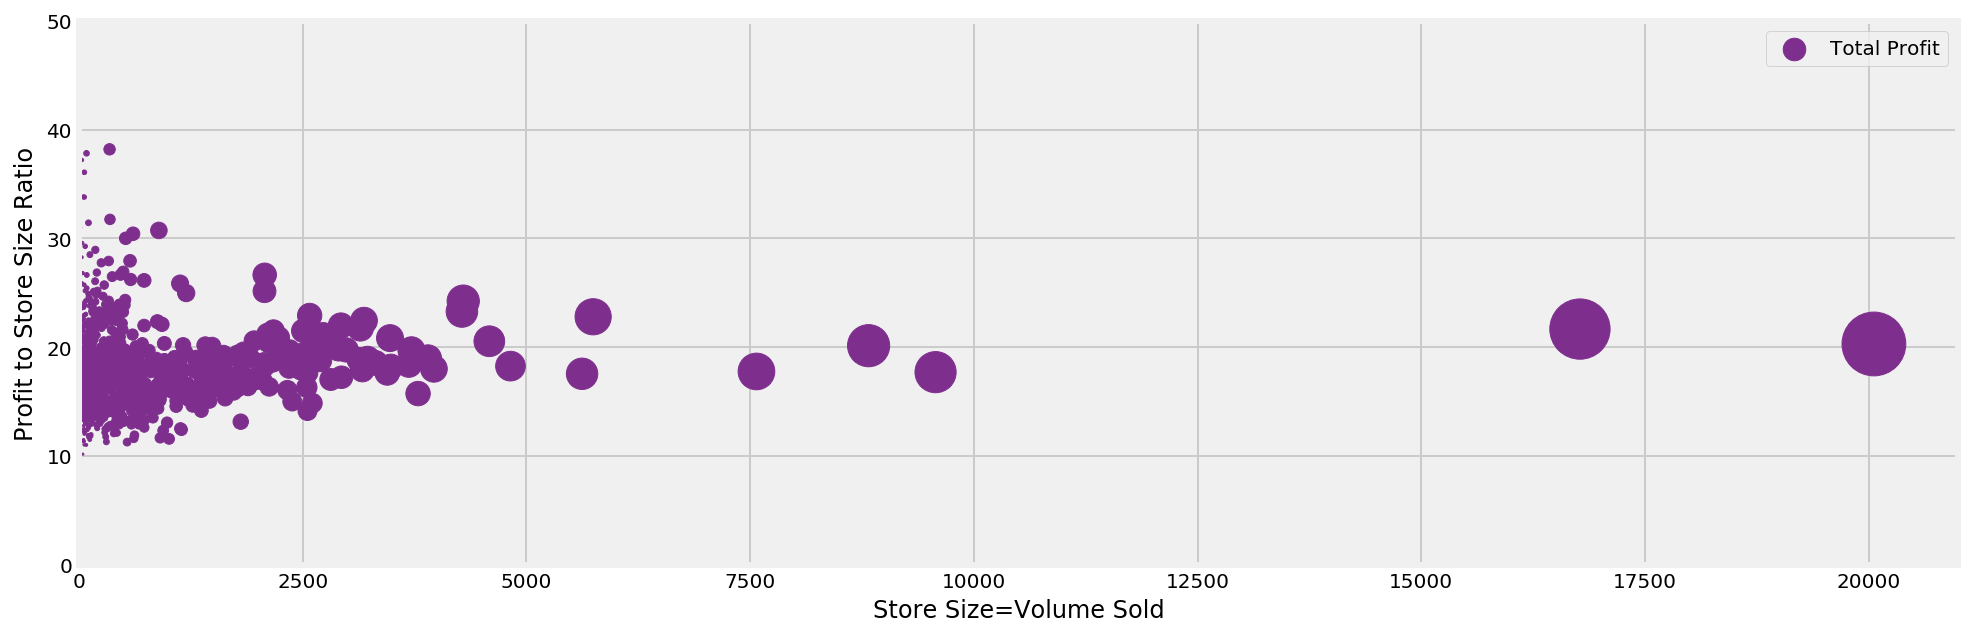

In [46]:
# Relevant plot
plt.figure(figsize=(15, 5))
plt.scatter(iowa2_sub2['Volume Sold (Gallons)'],iowa2_sub2['Profit per Gallon'], color=[0.4940, 0.1840, 0.5560],s=iowa2_sub2['Profit'].values/400)
plt.axis([0,4000,9,45])
plt.xlabel('Store Size=Volume Sold')
plt.ylabel('Profit to Store Size Ratio')
plt.legend(['Total Profit'],markerscale=0.5)
xmin, xmax, ymin, ymax = plt.axis([0, 21000, 0.0, 50.0])
plt.show()


### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [106]:
# We created ten broader categories
# Find a dictionary capturing the broader category for each of the more granular categories and a list capturing 
# broader categories as required

iowa2_5=iowa2['Category Name'].unique()
Cat2={}
for x in iowa2_5:
    if x.find('WHISKIES')!=-1:
        Cat2[x] = 'Whisky'
    elif x.find('VODKA')!=-1:
        Cat2[x] = 'Vodka'
    elif x.find('GINS')!=-1:
        Cat2[x] = 'Gin'
    elif x.find('TEQUILA')!=-1:
        Cat2[x] = 'Tequila'
    elif x.find('BRANDIES')!=-1:
        Cat2[x] = 'Brandy'
    elif x.find('SCHNAPPS')!=-1:
        Cat2[x] = 'Schnapps'
    elif x.find('RUM')!=-1:
        Cat2[x] = 'Rum'
    elif x.find('COCKTAILS')!=-1:
        Cat2[x] = 'Cocktails'
    elif x.find('BEER')!=-1:
        Cat2[x] = 'Beer'
    else:
        Cat2[x] = 'Misc'
print(Cat2)
iowa2['Liquor'] = iowa2['Category Name'].map(Cat2)
list(iowa2['Liquor'].unique())


{'APRICOT BRANDIES': 'Brandy', 'BLENDED WHISKIES': 'Whisky', 'STRAIGHT BOURBON WHISKIES': 'Whisky', 'AMERICAN COCKTAILS': 'Cocktails', 'VODKA 80 PROOF': 'Vodka', 'AMERICAN DRY GINS': 'Gin', 'AMERICAN GRAPE BRANDIES': 'Brandy', 'CANADIAN WHISKIES': 'Whisky', 'IMPORTED VODKA': 'Vodka', 'CINNAMON SCHNAPPS': 'Schnapps', 'SINGLE BARREL BOURBON WHISKIES': 'Whisky', 'PEPPERMINT SCHNAPPS': 'Schnapps', 'VODKA FLAVORED': 'Vodka', '100 PROOF VODKA': 'Vodka', 'DISTILLED SPIRITS SPECIALTY': 'Misc', 'TEQUILA': 'Tequila', 'TENNESSEE WHISKIES': 'Whisky', 'WHISKEY LIQUEUR': 'Misc', 'MISC. AMERICAN CORDIALS & LIQUEURS': 'Misc', 'APPLE SCHNAPPS': 'Schnapps', 'CHERRY BRANDIES': 'Brandy', 'MISC. IMPORTED CORDIALS & LIQUEURS': 'Misc', 'IMPORTED DRY GINS': 'Gin', 'WATERMELON SCHNAPPS': 'Schnapps', 'BLACKBERRY BRANDIES': 'Brandy', 'SINGLE MALT SCOTCH': 'Misc', 'PUERTO RICO & VIRGIN ISLANDS RUM': 'Rum', 'SPICED RUM': 'Rum', 'CREAM LIQUEURS': 'Misc', 'SCOTCH WHISKIES': 'Whisky', 'IMPORTED VODKA - MISC': 'Vodka'

['Brandy',
 'Whisky',
 'Cocktails',
 'Vodka',
 'Gin',
 'Schnapps',
 'Misc',
 'Tequila',
 'Rum',
 'Beer']

In [48]:
iowa2['Category Name'].unique()

array(['APRICOT BRANDIES', 'BLENDED WHISKIES',
       'STRAIGHT BOURBON WHISKIES', 'AMERICAN COCKTAILS',
       'VODKA 80 PROOF', 'AMERICAN DRY GINS', 'AMERICAN GRAPE BRANDIES',
       'CANADIAN WHISKIES', 'IMPORTED VODKA', 'CINNAMON SCHNAPPS',
       'SINGLE BARREL BOURBON WHISKIES', 'PEPPERMINT SCHNAPPS',
       'VODKA FLAVORED', '100 PROOF VODKA', 'DISTILLED SPIRITS SPECIALTY',
       'TEQUILA', 'TENNESSEE WHISKIES', 'WHISKEY LIQUEUR',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'APPLE SCHNAPPS',
       'CHERRY BRANDIES', 'MISC. IMPORTED CORDIALS & LIQUEURS',
       'IMPORTED DRY GINS', 'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES',
       'SINGLE MALT SCOTCH', 'PUERTO RICO & VIRGIN ISLANDS RUM',
       'SPICED RUM', 'CREAM LIQUEURS', 'SCOTCH WHISKIES',
       'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS', 'FLAVORED RUM',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'PEACH SCHNAPPS', '

### 5.6 Do relationships exist between the broader liquor type and profit?

In [49]:
# Certain broader types of liquor have stronger profitability such as Tequila, Brandies and Whisky
# However, they are not the most popular as determined by total volume sales: Whisky has $20/gallon profitablility 
# but it comes with a size of 140k Gallons in 2015. 
# Meanwhile, Tequila is very profitable but it's populairity is relatively lower at only 20k gallons

iowa2.head()
iowa2_6 = iowa2[['Liquor','Profit','Volume Sold (Gallons)']].groupby(['Liquor']).sum().reset_index()
iowa2_6['Profit per Gallon'] = iowa2_6['Profit'] / iowa2_6['Volume Sold (Gallons)']
iowa2_6 = iowa2_6.sort_values(by='Profit per Gallon', ascending = False)
iowa2_6

,Liquor,Profit,Volume Sold (Gallons),Profit per Gallon
0,Beer,9.518000e+01,0.40,237.950000
7,Tequila,6.080295e+05,23851.60,25.492189
1,Brandy,4.513383e+05,18579.60,24.292142
4,Misc,1.675697e+06,71138.31,23.555475
9,Whisky,3.411330e+06,168700.92,20.221173
5,Rum,1.480657e+06,84264.79,17.571477
3,Gin,2.913113e+05,17341.53,16.798477
6,Schnapps,4.064906e+05,24796.28,16.393207
8,Vodka,2.696614e+06,187701.70,14.366486
2,Cocktails,1.795435e+05,20466.57,8.772525


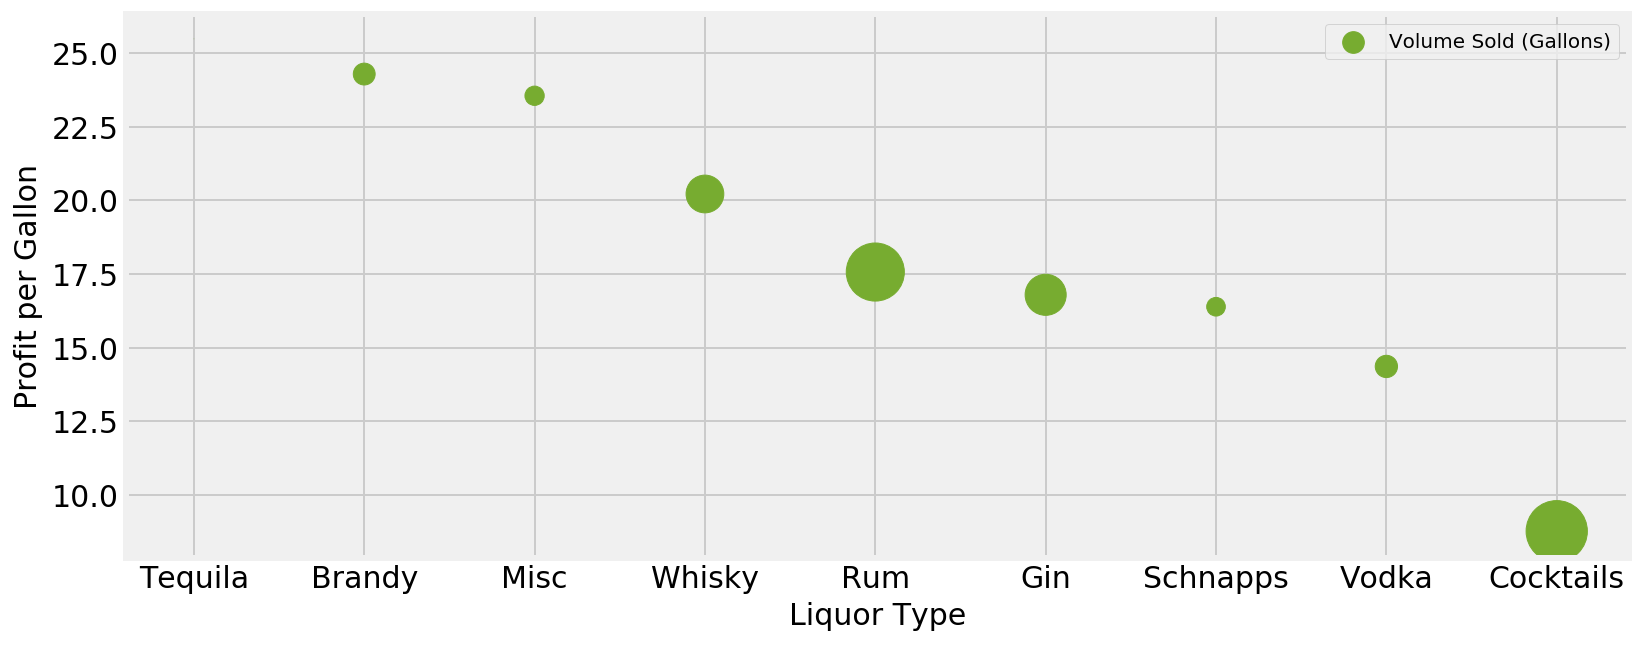

,Liquor,Profit,Volume Sold (Gallons),Profit per Gallon
0,Beer,9.518000e+01,0.40,237.950000
7,Tequila,6.080295e+05,23851.60,25.492189
1,Brandy,4.513383e+05,18579.60,24.292142
4,Misc,1.675697e+06,71138.31,23.555475
9,Whisky,3.411330e+06,168700.92,20.221173
5,Rum,1.480657e+06,84264.79,17.571477
3,Gin,2.913113e+05,17341.53,16.798477
6,Schnapps,4.064906e+05,24796.28,16.393207
8,Vodka,2.696614e+06,187701.70,14.366486
2,Cocktails,1.795435e+05,20466.57,8.772525


In [50]:
# Relevant Scatter plot

plt.figure(figsize=(12, 5))
plt.scatter(iowa2_6['Liquor'].loc[iowa2_6['Liquor'] != 'Beer'], iowa2_6['Profit per Gallon'].loc[iowa2_6['Liquor'] != 'Beer'], color=[0.4660, 0.6740, 0.1880],s=iowa2_6['Volume Sold (Gallons)'].values/200)
plt.xlabel("Liquor Type", fontsize=15)
plt.ylabel("Profit per Gallon", fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['Volume Sold (Gallons)'],markerscale=0.5)
plt.show()

iowa2_6


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [51]:
# Are there any noticeable relationships between liquor brand and sales? Profit?
# ...In general, the profitability is diminishing when the market size(scalability) start to increase.
# however, there are several brand names that stands out of the trend, such as Crown Royal Canadian Whisky
# its size is more than 6ku Gallon in 2015 and the profit/ratio is $35/gallon
# another is Jack Daniels Old #7 Black lbl, volume of more than 9k and the profit/ratio is still $34.7/gallon

iowa2_7 = iowa2[['Liquor','Item Description','Sale (Dollars)','Profit','Volume Sold (Gallons)']].groupby(['Liquor','Item Description']).sum().reset_index()
iowa2_7['Profit per Gallon'] = iowa2_7['Profit'] / iowa2_7['Volume Sold (Gallons)']
iowa2_7[(iowa2_7['Liquor']!='Misc')].sort_values(by=['Volume Sold (Gallons)','Profit per Gallon'], ascending = False).head(10)

,Liquor,Item Description,Sale (Dollars),Profit,Volume Sold (Gallons),Profit per Gallon
1771,Whisky,Black Velvet,1493872.67,510522.16,42993.15,11.874500
1399,Vodka,Hawkeye Vodka,683555.47,228055.41,28439.65,8.018925
936,Rum,Captain Morgan Spiced Rum,1132858.37,377755.62,17544.15,21.531714
1372,Vodka,Five O'clock Vodka,363032.16,121158.32,14774.46,8.200524
1299,Vodka,Barton Vodka,326148.97,108827.77,14399.48,7.557757
1969,Whisky,Jack Daniels Old #7 Black Lbl,1149630.04,383285.50,11023.75,34.769067
1486,Vodka,Phillips Vodka,234982.76,78384.00,9507.01,8.244864
1291,Vodka,Absolut Swedish Vodka 80 Prf,652821.24,217714.00,8086.40,26.923476
881,Rum,Bacardi Superior Rum,426829.89,142888.88,8018.82,17.819190
2148,Whisky,Seagrams 7 Crown Bl Whiskey,331725.41,110577.24,7671.00,14.414971


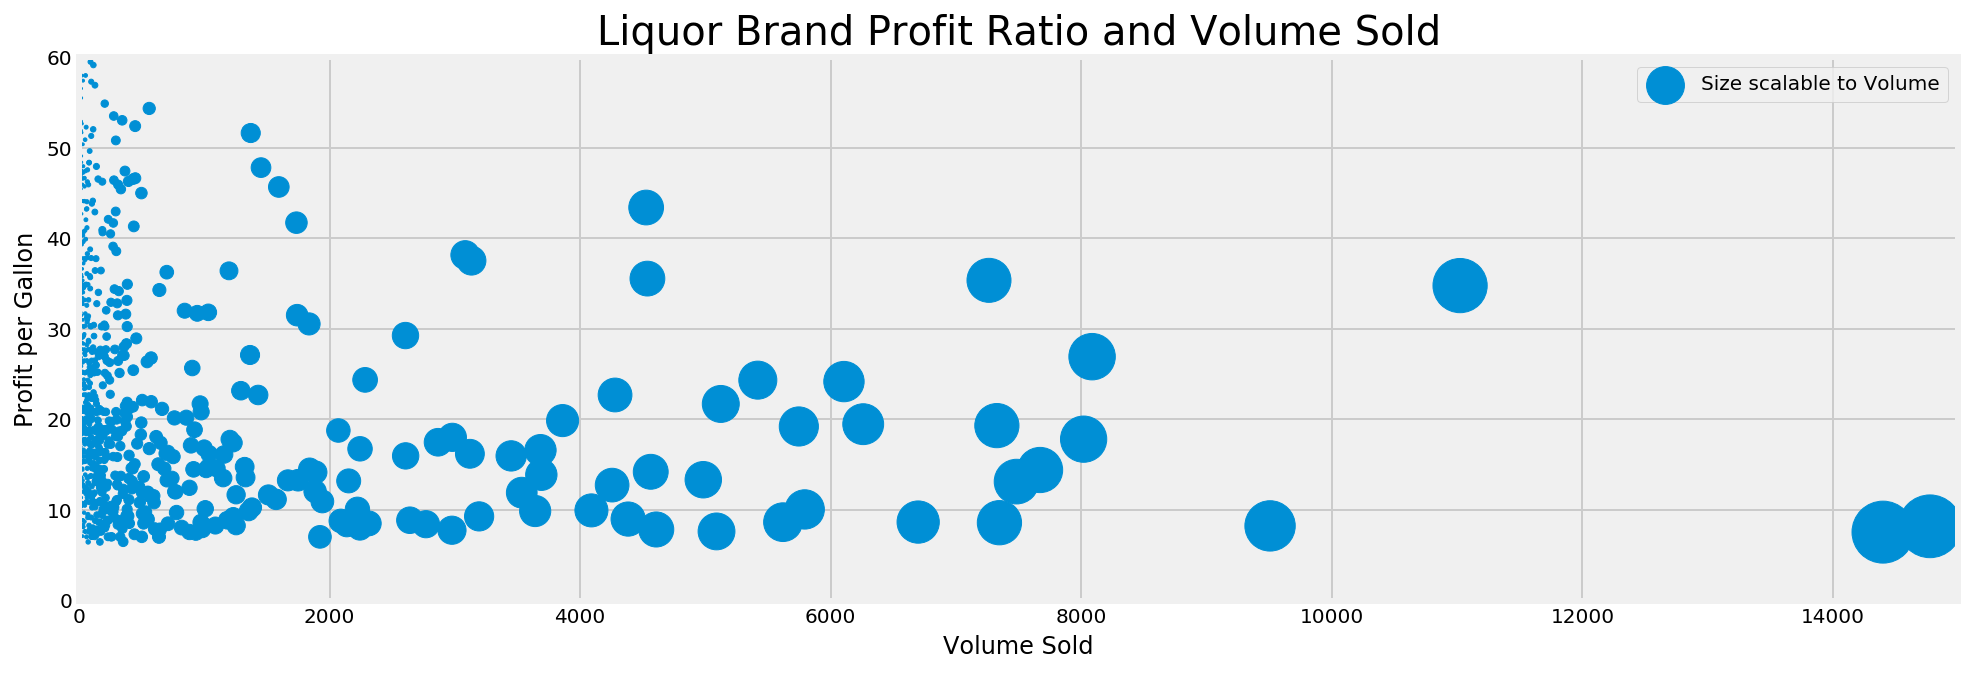

,Liquor,Item Description,Sale (Dollars),Profit,Volume Sold (Gallons),Profit per Gallon
1372,Vodka,Five O'clock Vodka,363032.16,121158.32,14774.46,8.200524
1299,Vodka,Barton Vodka,326148.97,108827.77,14399.48,7.557757
1969,Whisky,Jack Daniels Old #7 Black Lbl,1149630.04,383285.50,11023.75,34.769067
1486,Vodka,Phillips Vodka,234982.76,78384.00,9507.01,8.244864
1291,Vodka,Absolut Swedish Vodka 80 Prf,652821.24,217714.00,8086.40,26.923476
881,Rum,Bacardi Superior Rum,426829.89,142888.88,8018.82,17.819190
2148,Whisky,Seagrams 7 Crown Bl Whiskey,331725.41,110577.24,7671.00,14.414971
847,Rum,Admiral Nelson Spiced Rum,294737.69,98280.89,7483.45,13.133099
1432,Vodka,Mccormick Vodka Pet,189414.37,63164.08,7346.77,8.597531
1616,Vodka,Smirnoff Vodka 80 Prf,424161.47,141506.71,7326.40,19.314631


In [52]:
# Relevant scatter plot

subplot2_7 = iowa2_7[(iowa2_7['Liquor']!='Misc')].sort_values(by=['Profit per Gallon','Volume Sold (Gallons)'], ascending = False)
plt.figure(figsize=(15, 5))
plt.scatter(subplot2_7['Volume Sold (Gallons)'], subplot2_7['Profit per Gallon'],s=subplot2_7['Volume Sold (Gallons)'].values/15)
plt.xlabel("Volume Sold", fontsize=12)
plt.ylabel("Profit per Gallon", fontsize=12)
plt.title("Liquor Brand Profit Ratio and Volume Sold", fontsize=20)
plt.tick_params(labelsize=10)
plt.axis([0,15000,0,60])
plt.legend(['Size scalable to Volume'],markerscale=0.5)
plt.show()
iowa2_7[(iowa2_7['Liquor']!='Misc')&(iowa2_7['Profit per Gallon'] <60)&(iowa2_7['Volume Sold (Gallons)'] <15000)].sort_values(by=['Volume Sold (Gallons)'], ascending = False).head(20)

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [54]:
# We divide the stores into five store_size categories - Small (less than 2000 gallons per year), 
# medium (2000 - 4000 gallons per year) Large (4000 - 6000 gallons), Huge ( 6000 - 8000 gallons) 
# and Extremely Large (more than 8000 gallons)

# We calculated the proportion of the sales of each store_size category that each broad liquor type represent. 
# This would give us an idea of how to differentially tax based on liquor type as we can charge more if a liquor
# Type represents a large sales proportion for Extremely large stores but low proportion of sales for small stores

# Mean Volum column represents the relative sales volume of each liquor type for each store type

iowa2_sub2 = iowa2[['Store Number','Profit','Volume Sold (Gallons)']].groupby('Store Number').sum().reset_index()
iowa2_sub2.loc[iowa2_sub2['Volume Sold (Gallons)'] < 2000, 'regsize'] = 'Small'
iowa2_sub2.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 2000) & (iowa2_sub2['Volume Sold (Gallons)'] < 4000), 'regsize'] = 'Medium' 
iowa2_sub2.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 4000) & (iowa2_sub2['Volume Sold (Gallons)'] < 6000), 'regsize'] = 'Large'
iowa2_sub2.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 6000) & (iowa2_sub2['Volume Sold (Gallons)'] < 8000), 'regsize'] = 'Huge'
iowa2_sub2.loc[iowa2_sub2['Volume Sold (Gallons)'] >= 8000, 'regsize'] = 'Extremely Large'
iowa2_sub2[['Volume Sold (Gallons)', 'regsize']]

               
iowa2_6 = iowa2[['Store Number','Liquor','Category','Profit','Volume Sold (Gallons)']].groupby(['Store Number', 'Liquor']).sum().reset_index()
iowa2_6 = iowa2_6.join(iowa2_sub2[['Store Number', 'regsize']].set_index(['Store Number']), 'Store Number', lsuffix='_caller', rsuffix='_other')
               
iowa2_6['Profit per Gallon'] = iowa2_6['Profit'] / iowa2_6['Volume Sold (Gallons)']
iowa2_6 = iowa2_6.sort_values(by='Profit per Gallon', ascending = False)
iowa2_6 = iowa2_6.groupby(['regsize', 'Liquor']).mean().reset_index()

mean_vol_size = iowa2_6.groupby(['regsize']).sum().reset_index()
iowa2_6 = iowa2_6.join(mean_vol_size[['regsize', 'Volume Sold (Gallons)']].set_index(['regsize']), 'regsize', lsuffix='_caller', rsuffix='_other')

iowa2_6['Mean Vol'] = iowa2_6['Volume Sold (Gallons)_caller']*100/iowa2_6['Volume Sold (Gallons)_other']
iowa2_6

,regsize,Liquor,Store Number,Category,Profit,Volume Sold (Gallons)_caller,Profit per Gallon,Volume Sold (Gallons)_other,Mean Vol
0,Extremely Large,Brandy,3339.750000,5.388874e+07,4868.625000,157.307500,29.466399,13806.437500,1.139378
1,Extremely Large,Cocktails,3339.750000,2.436752e+07,963.730000,109.447500,8.728029,13806.437500,0.792728
2,Extremely Large,Gin,3339.750000,9.738250e+07,8489.847500,467.580000,18.059814,13806.437500,3.386681
3,Extremely Large,Misc,3339.750000,3.636190e+08,52848.002500,2550.085000,20.788385,13806.437500,18.470261
4,Extremely Large,Rum,3339.750000,2.196208e+08,32420.485000,1826.932500,17.548952,13806.437500,13.232469
5,Extremely Large,Schnapps,3339.750000,1.386828e+08,13813.387500,815.215000,17.469362,13806.437500,5.904601
6,Extremely Large,Tequila,3339.750000,1.474383e+08,30255.362500,1476.780000,21.287653,13806.437500,10.696315
7,Extremely Large,Vodka,3339.750000,4.661213e+08,68552.337500,3868.415000,17.005513,13806.437500,28.018922
8,Extremely Large,Whisky,3339.750000,3.533383e+08,67165.802500,2534.675000,26.275558,13806.437500,18.358646
9,Huge,Brandy,3420.000000,2.102802e+07,3474.000000,126.830000,27.390996,7570.330000,1.675356


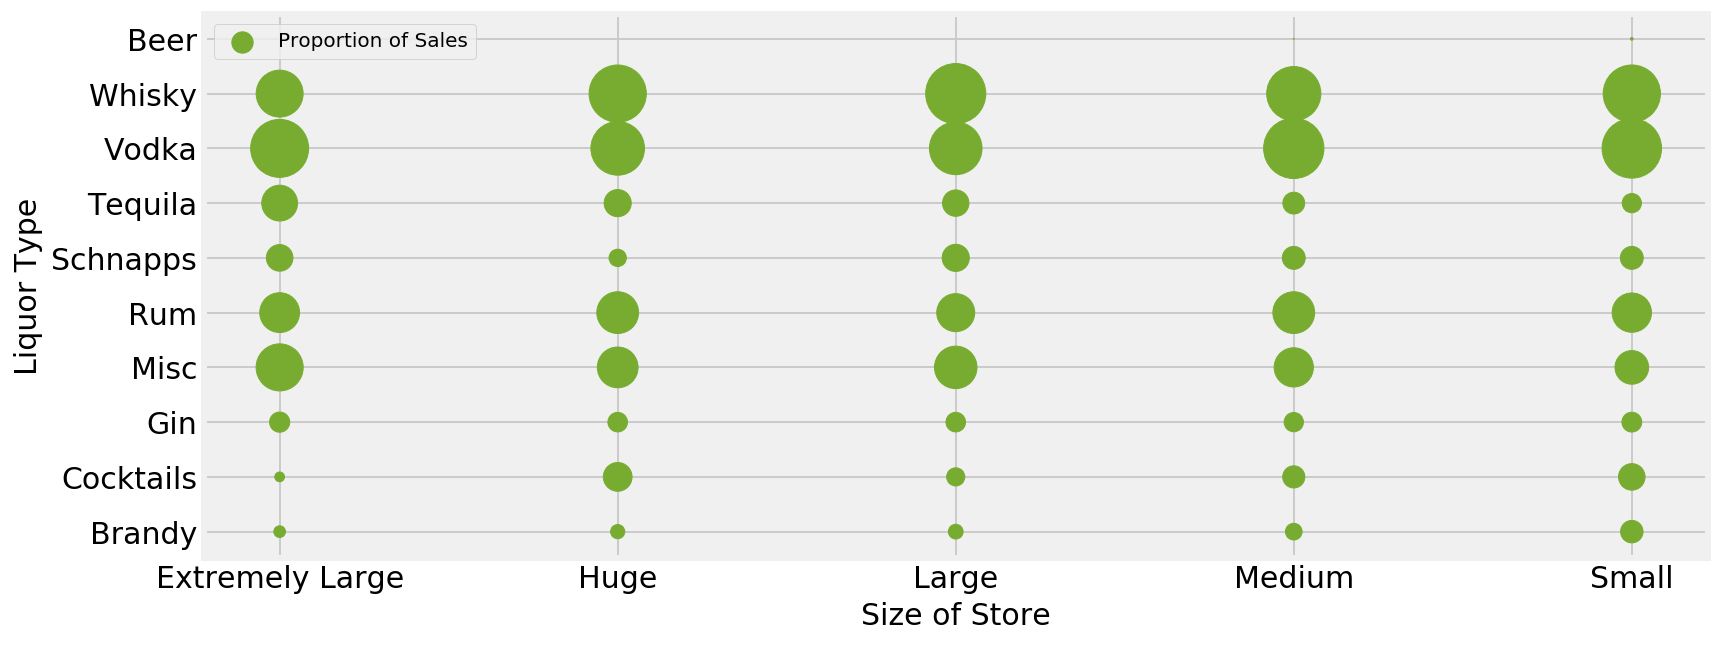

In [55]:
# Results: plotted with each circle representing the relative proportion of sales volume

#CONCLUSION: This shows that the biggest selling liquor types are the same for all store sizes with Vodka and Whiskey generating
# most of the sales for all store sizes. Rum and miscellenous are next in that order
# It is difficult to find a broad liquor category that is sold in significantly higher levels in the Extremely
# larger stores but not in the smaller stores. 

# However Tequilla shows some promise and a deeper more granular look may be beneficial

plt.figure(figsize=(12, 5))
plt.scatter(iowa2_6['regsize'], iowa2_6['Liquor'],color=[0.4660, 0.6740, 0.1880],s=iowa2_6['Mean Vol'].values*30)
plt.xlabel("Size of Store", fontsize=15)
plt.ylabel("Liquor Type", fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['Proportion of Sales'],markerscale=0.5)
plt.show()

In [56]:
# QUERY: For which Categories are there significant difference in relatvie sales volume between the small shops 
# the extra large

# Using the same store size classifications we calculate the difference in store size for each category 
# These are more granular than the broader categorization and should give more granular information


# Mean Volum column represents the relative sales volume of each Category for each store type

iowa2_sub3 = iowa2[['Store Number','Profit','Volume Sold (Gallons)']].loc[(iowa2['Category'] != 1701100.0) & (iowa2['Category'] != 1501100.0)].groupby('Store Number').sum().reset_index()
iowa2_sub3.loc[iowa2_sub2['Volume Sold (Gallons)'] < 2000, 'regsize'] = 'Small'
iowa2_sub3.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 2000) & (iowa2_sub2['Volume Sold (Gallons)'] < 4000), 'regsize'] = 'Medium' 
iowa2_sub3.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 4000) & (iowa2_sub2['Volume Sold (Gallons)'] < 6000), 'regsize'] = 'Large'
iowa2_sub3.loc[(iowa2_sub2['Volume Sold (Gallons)'] >= 6000) & (iowa2_sub2['Volume Sold (Gallons)'] < 8000), 'regsize'] = 'Huge'
iowa2_sub3.loc[iowa2_sub2['Volume Sold (Gallons)'] >= 8000, 'regsize'] = 'Extremely Large'
iowa2_sub3[['Volume Sold (Gallons)', 'regsize']]

               
iowa2_7 = iowa2[['Store Number','Liquor','Category','Profit','Volume Sold (Gallons)']].loc[(iowa2['Category'] != 1701100.0) & (iowa2['Category'] != 1501100.0)].groupby(['Store Number', 'Category']).sum().reset_index()
iowa2_7 = iowa2_7.join(iowa2_sub3[['Store Number', 'regsize']].set_index(['Store Number']), 'Store Number', lsuffix='_caller', rsuffix='_other')
               
iowa2_7['Profit per Gallon'] = iowa2_7['Profit'] / iowa2_7['Volume Sold (Gallons)']
iowa2_7 = iowa2_7.sort_values(by='Profit per Gallon', ascending = False)
iowa2_7 = iowa2_7.groupby(['regsize', 'Category']).mean().reset_index()

mean_vol_size = iowa2_7.groupby(['regsize']).sum().reset_index()
iowa2_7 = iowa2_7.join(mean_vol_size[['regsize', 'Volume Sold (Gallons)']].set_index(['regsize']), 'regsize', lsuffix='_caller', rsuffix='_other')

iowa2_7['Mean Vol'] = iowa2_7['Volume Sold (Gallons)_caller']*100/iowa2_7['Volume Sold (Gallons)_other']
iowa2_7 = iowa2_7.sort_values(['Category'], ascending=False)
#iowa2_7.loc[iowa2_7['Category'] == 1022100.0] 
iowa1.loc[iowa1['Category'] == 1022100.0]       

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month,Year
23,2015-11-12,4376,MASON CITY,50401,17.0,Cerro Gordo,1022100.0,TEQUILA,395,89196,Jose Cuervo Especial Reposado Tequila,750,10.49,15.74,12,188.88,9.00,2.38,11,2015
68,2015-11-11,4979,CEDAR RAPIDS,52402,57.0,Linn,1022100.0,TEQUILA,395,89194,Jose Cuervo Especial Reposado Flask,375,5.50,8.25,24,198.00,9.00,2.38,11,2015
128,2016-02-02,4084,ANKENY,50023,77.0,Polk,1022100.0,TEQUILA,395,89196,Jose Cuervo Especial Reposado Tequila,750,10.49,15.74,12,188.88,9.00,2.38,2,2016
131,2015-04-20,5124,JOHNSTON,50131,77.0,Polk,1022100.0,TEQUILA,395,87510,1800 Silver Tequila,750,15.46,23.19,3,69.57,2.25,0.59,4,2015
138,2015-03-11,4129,AMES,50010,85.0,Story,1022100.0,TEQUILA,260,66178,Peligroso Cinnamon,750,11.50,17.25,1,17.25,0.75,0.20,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270815,2015-04-28,3495,MONTICELLO,52310,53.0,Jones,1022100.0,TEQUILA,35,89121,Cazadores Reposado,750,13.75,22.50,1,22.50,0.75,0.20,4,2015
270899,2016-01-13,3980,IOWA CITY,52246,52.0,Johnson,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,12,225.00,12.00,3.17,1,2016
270926,2015-12-26,2478,ALTOONA,50009,77.0,Polk,1022100.0,TEQUILA,410,89646,Patron Anejo,750,31.00,46.50,6,279.00,4.50,1.19,12,2015
270936,2015-03-31,2552,CEDAR RAPIDS,52404,57.0,Linn,1022100.0,TEQUILA,395,89196,Jose Cuervo Especial Reposado Tequila,750,10.49,15.74,12,188.88,9.00,2.38,3,2015


In [57]:
# Next we subtract the difference between proportion of sales of the small groups for each category 
# with that of the Extremely large and the large stores

cat_list = iowa2_7['Category'].unique()
dicta = {}
for i in cat_list:
    gear = iowa2_7.loc[iowa2_7['Category'] == i, ['Category','regsize', 'Mean Vol']]
    dicta[i] = {}
    for j in range(len(gear['regsize'])):
        dicta[i][list(gear['regsize'])[j]] = list(gear['Mean Vol'])[j]
dicta

dictc = {}
dictd = {}
for v, k in enumerate(dicta):
    dictc[k] = dicta[k].get('Small', 0) - dicta[k].get('Extremely Large', 0)
    dictd[k] = dicta[k].get('Small', 0) - dicta[k].get('Huge', 0) 

In [58]:
# Difference between small and Extremely Large Store

# The largest difference was for 1022100 (Tequila) with the Extremely large store outselling the small stores by 
# a difference of 8.5%

# This category represents 10% of sales for the extremely large stores but only 2.17% for the small stores! 
# Boom!!
dictc 

{1101100.0: 0.43961438971398054,
 1092100.0: 0.08498001449456731,
 1091300.0: 0.12534552137948676,
 1091100.0: 0.17895641660010875,
 1082900.0: -2.6347355856209473,
 1082200.0: 0.08922901521929566,
 1082100.0: 0.0931428808515919,
 1082015.0: 0.25281554312133775,
 1082010.0: 1.5168932587280264,
 1081900.0: -0.055665664965491746,
 1081700.0: -0.9986617501430952,
 1081600.0: -3.089435959623734,
 1081500.0: 0.1613986806386121,
 1081400.0: -1.5288631402378627,
 1081390.0: -0.22576553621251905,
 1081380.0: 0.3651294853448225,
 1081370.0: -0.009084010454920188,
 1081365.0: 0.29320603068279943,
 1081355.0: 0.13451201272462196,
 1081350.0: 0.23898061222881742,
 1081340.0: 0.338954213055204,
 1081335.0: 0.038471342522964525,
 1081330.0: -0.34234158836243844,
 1081317.0: -0.5798165117124993,
 1081315.0: 0.33723410290173933,
 1081312.0: 0.17519848544476618,
 1081305.0: 0.0394777804662515,
 1081300.0: 0.857184687956068,
 1081250.0: 0.12337775074201542,
 1081240.0: 0.2200667179741863,
 1081230.0: 0.

In [59]:
# Difference between small and Large Store

# The largest difference was for 1022100 (Tequila) with the large store outselling the small stores by a 
# difference of 3.6%
dictd

{1101100.0: 0.4376043088819138,
 1092100.0: 0.08498001449456731,
 1091300.0: 0.12534552137948676,
 1091100.0: 0.22484295501687598,
 1082900.0: -0.17648888130814577,
 1082200.0: 0.08922901521929566,
 1082100.0: 0.13117659684214583,
 1082015.0: 0.25281554312133775,
 1082010.0: 1.5168932587280264,
 1081900.0: 0.6095888047060942,
 1081700.0: -0.21328915380239555,
 1081600.0: -4.280392899381006,
 1081500.0: 0.1685639287510095,
 1081400.0: -0.702405606662516,
 1081390.0: 1.0502473567312587,
 1081380.0: 0.5518059115458429,
 1081370.0: 0.07336892711247434,
 1081365.0: 0.3448283864016626,
 1081355.0: 0.263703607478454,
 1081350.0: 0.3192820544581601,
 1081340.0: 0.4460228026943276,
 1081335.0: 0.3319811355715399,
 1081330.0: 0.27421675739871465,
 1081317.0: -0.06610972689540823,
 1081315.0: 0.40080457016156146,
 1081312.0: 0.4197956401696367,
 1081305.0: -0.057902873920386067,
 1081300.0: 0.8424346908076559,
 1081250.0: 0.14060329670919303,
 1081240.0: 0.2602596585642674,
 1081230.0: 0.20387960

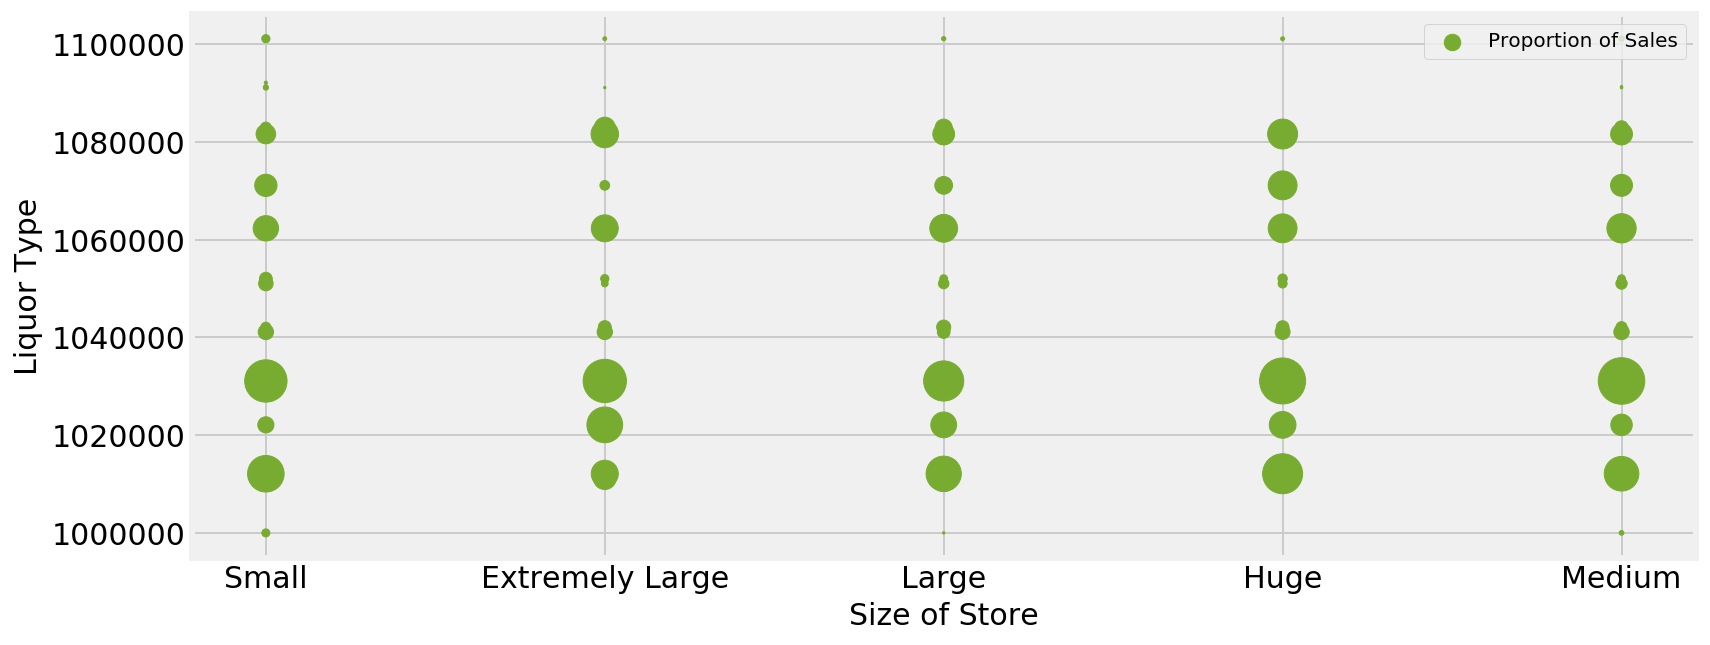

In [60]:
# Results plotted with each circle representing the relative proportion of sales volume
# This shows that the biggest selling Categories are the same for all store sizes generally but the detailed look
# as demonstrated above showed significant difference for Tequila (Category 1022100.0)


plt.figure(figsize=(12, 5))
plt.scatter(iowa2_7['regsize'], iowa2_7['Category'],color=[0.4660, 0.6740, 0.1880],s=iowa2_7['Mean Vol'].values*30)
plt.xlabel("Size of Store", fontsize=15)
plt.ylabel("Liquor Type", fontsize=15)
plt.tick_params(labelsize=15)
plt.legend(['Proportion of Sales'],markerscale=0.5)
plt.show()

In [61]:
# REPORT

'''
After a review of the data, we find that there are there are few difference between the sales profile of the larger 
stores and that of the smaller stores. Most stores make most of their revenue from Whisky and Vodka. It is s 
Statewide phenomena. Taxing both liquor catgories would affect all stores except an obvious tax like a progressive
sales tax that would take more from the largers stores because they have more volumes sold

However, there is one main difference - Tequila

Tequila consists of 10% of the sales of the Extremely large stores but only 2% of the small Mom and Pop stores.
Taxing Tequila makes sense also because the profit per gallon ratio $25/gallon is high meaning that customers who 
buy Tequila are well to do and the demand should be elastic.

Thus taxing Tequila may not reduce sales as much as taxing say Vodka and the volume of sales should lead to 
relatively high tax return
'''

'\nAfter a review of the data, we find that there are there are few difference between the sales profile of the larger \nstores and that of the smaller stores. Most stores make most of their revenue from Whisky and Vodka. It is s \nStatewide phenomena. Taxing both liquor catgories would affect all stores except an obvious tax like a progressive\nsales tax that would take more from the largers stores because they have more volumes sold\n\nHowever, there is one main difference - Tequila\n\nTequila consists of 10% of the sales of the Extremely large stores but only 2% of the small Mom and Pop stores.\nTaxing Tequila makes sense also because the profit per gallon ratio $25/gallon is high meaning that customers who \nbuy Tequila are well to do and the demand should be elastic.\n\nThus taxing Tequila may not reduce sales as much as taxing say Vodka and the volume of sales should lead to \nrelatively high tax return\n'


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [62]:
# Because Zip Codes are not uniquely linked to Cities and also cities are also not uniquely linked to counties,
# using Zip Code or City to join (2015 data with 2016 data) would lead to increase in entries due to false joins
# In order to avoid this, we created a unique identifier for each 'area' called 'join key' for every area by 
# concatenating the Zip code with the City's name 

iowa1['Join Key'] = [i for i in iowa1['Zip Code'] +' '+ iowa1['City']]

# Slicing out the Q1 sales for 2015
Q1_2015_Sales = iowa1.loc[(iowa1['Month'].isin([1,2,3])) & (iowa1['Year'] == 2015)]
Q1_2015_Sales = Q1_2015_Sales[['Join Key', 'City', 'Zip Code','County', 'County Number', 'Sale (Dollars)', 'Volume Sold (Gallons)']].groupby(['Join Key', 'Zip Code', 'City','County Number']).sum().reset_index()

# Slicing out the Q1 Sales for 2016
Q1_2016_Sales = iowa1.loc[(iowa1['Month'].isin([1,2,3])) & (iowa1['Year'] == 2016)]
Q1_2016_Sales = Q1_2016_Sales[['Join Key','City', 'Zip Code', 'County', 'County Number', 'Sale (Dollars)', 'Volume Sold (Gallons)']].groupby(['Join Key','Zip Code', 'City', 'County Number']).sum().reset_index()

# Joining both sets of data and calculating the Sales (dollars) and Volume Sold (Gallons) growth rate
Sales_growth = Q1_2015_Sales.join(Q1_2016_Sales[['Join Key','Sale (Dollars)', 'Volume Sold (Gallons)']].set_index('Join Key'), ['Join Key'], lsuffix='_2015', rsuffix='_2016')
Sales_growth['Dollar Sales Growth'] = (Sales_growth['Sale (Dollars)_2016'] - Sales_growth['Sale (Dollars)_2015'])/ Sales_growth['Sale (Dollars)_2016'] 
Sales_growth['Volume Sales Growth'] = (Sales_growth['Volume Sold (Gallons)_2016'] - Sales_growth['Volume Sold (Gallons)_2015'])/ Sales_growth['Volume Sold (Gallons)_2016'] 

# Printing out the result
print('Top 20 Growing Areas for Dollar Sales Are:', Sales_growth[['Join Key','Dollar Sales Growth']].sort_values(by='Dollar Sales Growth', ascending=False).reset_index().head(20), '\n')
print('Top 20 Growing Areas for Volume Sales Are:', Sales_growth[['Join Key','Volume Sales Growth']].sort_values(by='Volume Sales Growth', ascending=False).reset_index().head(20))


Top 20 Growing Areas for Dollar Sales Are:     index             Join Key  Dollar Sales Growth
0     260        51355 OKOBOJI             0.988137
1     320  52146 HARPERS FERRY             0.931950
2     359       52337 STANWOOD             0.907903
3     404     52722 BETTENDORF             0.905069
4      78          50251 SULLY             0.897555
5     132     50501 FORT DODGE             0.879863
6     271       51462 SCRANTON             0.873369
7     214        51005 AURELIA             0.858126
8     324      52162 POSTVILLE             0.817740
9     193      50680 WELLSBURG             0.815479
10     74     50248 CLEAR LAKE             0.815029
11    391       52623 DANVILLE             0.804271
12    415    52751 GRAND MOUND             0.801054
13    115        50430 CORWITH             0.786786
14    186    50665 PARKERSBURG             0.785464
15    352  52317 NORTH LIBERTY             0.750602
16    397       52639 MONTROSE             0.736938
17    387      52577 

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [63]:
# We seek to develop a metric that is indicative of future sales assuming growth continues at current rates.

# First, in order to be able to compare current sales for each area we normalize them by dividing current sales for 
# each area by the maximum sales of any area. This sub-metric we call Max_vol_ratio

# Future sales for any area after n years when compared to today's maximum volume sale for any area would be 
# Max_vol_ratio*(1 + Growth rate)^n. By Taylor's expansion this is Max_vol_ratio*(1 + n * Growth_rate) if we 
# disregard higher order terms. Thus sales would approximately be Max_vol_ratio + n * Max_vol_ratio * Growth_rate
# in n years. 

# We can then have a Performance metric Max_vol_ratio * Growth_rate which we have called Perf_Metric which can track
# to a relatively good extent the potential size of future sales relative to today's maximum volume sales of any area

#Caluculating the max_vol_rate and showing the top 20 volume sellers
Sales_growth['Max_vol_ratio'] = Sales_growth['Volume Sold (Gallons)_2016']/Sales_growth['Volume Sold (Gallons)_2016'].max()
Sales_growth[['Join Key','Max_vol_ratio']].sort_values(by='Max_vol_ratio', ascending=False).reset_index().head(20)

#See next cell for continuation of solution

,index,Join Key,Max_vol_ratio
0,94,50314 DES MOINES,1.000000
1,99,50320 DES MOINES,0.993422
2,338,52240 IOWA CITY,0.907899
3,371,52402 CEDAR RAPIDS,0.850708
4,4,50010 AMES,0.719098
5,428,52807 DAVENPORT,0.709249
6,273,51501 COUNCIL BLUFFS,0.643699
7,295,52001 DUBUQUE,0.593206
8,236,51106 SIOUX CITY,0.549560
9,165,50613 CEDAR FALLS,0.512317


In [64]:
# Calculate the Performance metric and sorts the data by the metric

# We also verify (sort of) the suitability of our metric by comparing it with projectd sales volumes in 3 years time

# A visual review indicates that the metric is largely suitable for n = 3 years - a typical business plan cycle

# However, as n grows the cities with high growth rates start to outperform the metric which weighs current  
# volume sales equally with sales growth rate. As n increases so too does the effect of growth over the effect of 
# current sales volume, thus the difference.


Sales_growth['Perf_Metric'] = Sales_growth['Max_vol_ratio'] * Sales_growth['Volume Sales Growth']
Sales_growth['Three_Year_Proj'] = Sales_growth['Max_vol_ratio'] * ((1+Sales_growth['Volume Sales Growth'])**3)
Sales_growth[['Join Key','Max_vol_ratio','Volume Sales Growth','Perf_Metric', 'Three_Year_Proj']].sort_values(by='Perf_Metric', ascending=False).head(20)

,Join Key,Max_vol_ratio,Volume Sales Growth,Perf_Metric,Three_Year_Proj
404,52722 BETTENDORF,0.384068,0.883128,0.339181,2.564763
132,50501 FORT DODGE,0.375901,0.861905,0.323991,2.426309
428,52807 DAVENPORT,0.709249,0.428814,0.304136,2.068833
338,52240 IOWA CITY,0.907899,0.182427,0.165625,1.500928
349,52314 MOUNT VERNON,0.285225,0.575851,0.164247,1.116177
264,51442 DENISON,0.230570,0.618908,0.142701,0.978292
273,51501 COUNCIL BLUFFS,0.643699,0.175935,0.113249,1.046727
352,52317 NORTH LIBERTY,0.140746,0.787600,0.110852,0.803984
83,50266 WEST DES MOINES,0.287433,0.360903,0.103736,0.724467
236,51106 SIOUX CITY,0.549560,0.181932,0.099982,0.907387


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [65]:
'''
We would recommend Bittendorf (Zip Code = 52722) a town in Scott county. 

This is because Bittendorf has the highest performance metric of 0.34 derived from a volumne growth rate of 88% 
( the 4th largest in Iowa) and a total volume sales is not too low at 38% of the maximum sales volume in Iowa

In three year time, its total volume sales is estimated to be more than 2.5 times the maximum sales volume anywhere
in Iowa today

It is also a good cosmopolitan area, part of a larger metropolis with a population of ovver 300,000 people, a hub 
with connetions via freeways to other citis in Iowa and beyond thus potentially simplifying supply chain logistics.

It also has a growing population (between 11 and 6 percent) growth which should sustain sales growth over the mid
to long term
'''

'\nWe would recommend Bittendorf (Zip Code = 52722) a town in Scott county. \n\nThis is because Bittendorf has the highest performance metric of 0.34 derived from a volumne growth rate of 88% \n( the 4th largest in Iowa) and a total volume sales is not too low at 38% of the maximum sales volume in Iowa\n\nIn three year time, its total volume sales is estimated to be more than 2.5 times the maximum sales volume anywhere\nin Iowa today\n\nIt is also a good cosmopolitan area, part of a larger metropolis with a population of ovver 300,000 people, a hub \nwith connetions via freeways to other citis in Iowa and beyond thus potentially simplifying supply chain logistics.\n\nIt also has a growing population (between 11 and 6 percent) growth which should sustain sales growth over the mid\nto long term\n'

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [105]:
# To maximize profit there are certain parameters that would determine optimal profit
# These include profit margin (marginal profit) and Marginal Cost.
# In a competitive market, Price should be equal or close to Marginal Cost. This appears not to be so 
# in this market

# To maximize profit, we theorize that this would happen at when profit margin i.e. profit per dollar spent is 
# maximum.

# CONCLUSION: Cocktails give the best marginal dollar of profit per marginal dollar of capital invested. 
# Next is Whisky, then Vodka


iowa2['Cost'] = iowa2['State Bottle Cost'] * iowa2['Bottles Sold']

Best_Liquor = iowa2[['Volume Sold (Gallons)', 'Liquor', 'City', 'Zip Code', 'Profit', 'Cost']].groupby(['Liquor']).sum().reset_index()
Best_Liquor['Profit Margin'] = Best_Liquor['Profit']/Best_Liquor['Cost']
Best_Liquor['Profit per Gallon'] = Best_Liquor['Profit']/Best_Liquor['Volume Sold (Gallons)']
Best_Liquor['Cost per Gallon'] = Best_Liquor['Cost']/Best_Liquor['Volume Sold (Gallons)']
Best_Liquor = Best_Liquor.sort_values(['Profit Margin'], ascending=False)
Best_Liquor

,Liquor,Volume Sold (Gallons),Profit,Cost,Profit Margin,Profit per Gallon,Cost per Gallon
2,Cocktails,20466.57,1.795435e+05,3.541423e+05,0.506981,8.772525,17.303451
9,Whisky,168700.92,3.411330e+06,6.765373e+06,0.504234,20.221173,40.102764
8,Vodka,187701.70,2.696614e+06,5.371293e+06,0.502042,14.366486,28.616111
3,Gin,17341.53,2.913113e+05,5.808535e+05,0.501523,16.798477,33.494938
5,Rum,84264.79,1.480657e+06,2.955837e+06,0.500926,17.571477,35.077960
1,Brandy,18579.60,4.513383e+05,9.010644e+05,0.500895,24.292142,48.497516
4,Misc,71138.31,1.675697e+06,3.345688e+06,0.500853,23.555475,47.030744
7,Tequila,23851.60,6.080295e+05,1.214149e+06,0.500787,25.492189,50.904303
6,Schnapps,24796.28,4.064906e+05,8.125570e+05,0.500261,16.393207,32.769313
0,Beer,0.40,9.518000e+01,1.903400e+02,0.500053,237.950000,475.850000


In [86]:
# To identify the best location to site a store for a restrictd inventory type
# We have used the same rationale used to determine the best location for a new store
# We theorize that best location for a singl inventory store would be a location that has a rapid growth
# in deman of the inventory type, a healthy base sales rate and a healthy proifit margin for the inventory type
# We have considered these three indicies in arriving at the best location for each inventory type
# based on a performance indicator developed to indicate future relative profit margin over the next three years 
# when compard to todays cost invested

# This is an indicator of future profit is: 
# Profit margin for Liquor type * Volume sales growth rate from 2015 Q1 to 2016 Q1 * Current Volume Sales Ratio

# We show the best ten locations for three of the inventory types with the largest profit margins

# CONCLUSION: The recommendation should change if he is only willing to sell one inventory type and this location 
# would change depending on the inventory. Best location for one inventory type is:
# City of Ames, Zip Code: 50010. This is different from Bettendorf which is in the top 10 for each inventory type 
# researched


def Best_location(dbase, liqur):
    dbase['Join Key'] = [i for i in dbase['Zip Code'] +' '+ dbase['City']]
    
    #Calculating Cost per gallon
    dbase['Cost'] = dbase['State Bottle Cost'] * dbase['Bottles Sold']
    
    # Slicing out the Q1 sales for 2015 for the Liquor type
    Q1_2015_Sales = dbase.loc[(dbase['Month'].isin([1,2,3])) & (dbase['Year'] == 2015) & (dbase['Liquor']== liqur)]
    Q1_2015_Sales = Q1_2015_Sales[['Join Key', 'City', 'Zip Code','County', 'County Number', 'Sale (Dollars)', 'Volume Sold (Gallons)', 'Profit', 'Cost']].groupby(['Join Key', 'Zip Code', 'City','County Number']).sum().reset_index()
    Q1_2015_Sales['Profit Margin'] = Q1_2015_Sales['Profit']/Q1_2015_Sales['Cost']
    
    # Slicing out the Q1 Sales for 2016 for the Liquor type
    Q1_2016_Sales = dbase.loc[(iowa1['Month'].isin([1,2,3])) & (dbase['Year'] == 2016) & (dbase['Liquor']== liqur)]
    Q1_2016_Sales = Q1_2016_Sales[['Join Key','City', 'Zip Code', 'County', 'County Number', 'Sale (Dollars)', 'Volume Sold (Gallons)', 'Profit', 'Cost']].groupby(['Join Key','Zip Code', 'City', 'County Number']).sum().reset_index()
    Q1_2016_Sales['Profit Margin'] = Q1_2016_Sales['Profit']/Q1_2016_Sales['Cost']
    
    # Joining both sets of data and calculating the Sales (dollars) and Volume Sold (Gallons) growth rate
    Sales_growth = Q1_2015_Sales.join(Q1_2016_Sales[['Join Key','Sale (Dollars)', 'Volume Sold (Gallons)', 'Profit Margin']].set_index('Join Key'), ['Join Key'], lsuffix='_2015', rsuffix='_2016')
    Sales_growth['Dollar Sales Growth'] = (Sales_growth['Sale (Dollars)_2016'] - Sales_growth['Sale (Dollars)_2015'])/ Sales_growth['Sale (Dollars)_2016'] 
    Sales_growth['Volume Sales Growth'] = (Sales_growth['Volume Sold (Gallons)_2016'] - Sales_growth['Volume Sold (Gallons)_2015'])/ Sales_growth['Volume Sold (Gallons)_2016'] 

    # Printing out the result
    # Sales_growth[['Join Key','Dollar Sales Growth']].sort_values(by='Dollar Sales Growth', ascending=False).reset_index().head(20), '\n')
    #Sales_growth[['Join Key','Volume Sales Growth']].sort_values(by='Volume Sales Growth', ascending=False).reset_index()


    Sales_growth['Max_vol_ratio'] = Sales_growth['Volume Sold (Gallons)_2016']/Sales_growth['Volume Sold (Gallons)_2016'].max()
    #Sales_growth[['Join Key','Max_vol_ratio']].sort_values(by='Max_vol_ratio', ascending=False).reset_index().head(20)

    Sales_growth['Perf_Metric'] = Sales_growth['Max_vol_ratio'] * Sales_growth['Volume Sales Growth']
    Sales_growth['Maximized Profit'] = Sales_growth['Max_vol_ratio'] * Sales_growth['Volume Sales Growth'] * Sales_growth['Profit Margin_2016']
    Sales_growth['Three_Year_Marginal_Profit_Proj'] = Sales_growth['Max_vol_ratio'] * ((1+Sales_growth['Volume Sales Growth'])**3) * Sales_growth['Profit Margin_2016']
    
    return Sales_growth[['Join Key','Max_vol_ratio','Volume Sales Growth','Perf_Metric', 'Maximized Profit', 'Three_Year_Marginal_Profit_Proj']].loc[~Sales_growth['Max_vol_ratio'].isna()].sort_values(by='Maximized Profit', ascending=False).head(10)



In [92]:
Cocktails_list = Best_location(iowa2, 'Cocktails')
Cocktails_list

,Join Key,Max_vol_ratio,Volume Sales Growth,Perf_Metric,Maximized Profit,Three_Year_Marginal_Profit_Proj
2,50010 AMES,1.000000,0.711367,0.711367,0.357204,2.516819
168,52240 IOWA CITY,0.897861,0.645518,0.579585,0.290172,2.002881
223,52807 DAVENPORT,0.999484,0.576015,0.575719,0.288096,1.957874
36,50266 WEST DES MOINES,0.622890,0.668736,0.416549,0.208623,1.449677
12,50125 INDIANOLA,0.531963,0.765112,0.407011,0.203925,1.465760
208,52722 BETTENDORF,0.352236,0.898646,0.316536,0.163982,1.248938
209,52722 BETTENDORF,0.352236,0.770765,0.271491,0.140647,1.013191
80,50613 CEDAR FALLS,0.453731,0.543389,0.246552,0.124784,0.844257
43,50313 DES MOINES,0.178631,0.900072,0.160781,0.080391,0.612686
60,50428 CLEAR LAKE,0.217296,0.698695,0.151824,0.075912,0.532560


In [95]:
Whisky_list = Best_location(iowa2, 'Whisky')
Whisky_list

,Join Key,Max_vol_ratio,Volume Sales Growth,Perf_Metric,Maximized Profit,Three_Year_Marginal_Profit_Proj
250,51442 DENISON,0.696069,0.800446,0.557166,0.295855,2.157180
126,50501 FORT DODGE,0.622991,0.897953,0.559417,0.286774,2.183442
223,51106 SIOUX CITY,1.000000,0.505294,0.505294,0.255694,1.726000
60,50211 NORWALK,0.374518,0.833449,0.312142,0.164135,1.213750
212,51041 ORANGE CITY,0.327043,0.910977,0.297928,0.158430,1.213659
382,52722 BETTENDORF,0.367818,0.855204,0.314559,0.157331,1.174682
397,52772 TIPTON,0.318602,0.821717,0.261801,0.139800,1.028555
127,50501 FORT DODGE,0.622991,0.410180,0.255538,0.130997,0.895589
186,50702 WATERLOO,0.482317,0.529080,0.255184,0.128133,0.865826
257,51501 COUNCIL BLUFFS,0.914334,0.229700,0.210022,0.105126,0.851034


In [94]:
Vodka_list = Best_location(iowa2, 'Vodka')
Vodka_list

,Join Key,Max_vol_ratio,Volume Sales Growth,Perf_Metric,Maximized Profit,Three_Year_Marginal_Profit_Proj
392,52807 DAVENPORT,0.737817,0.573185,0.422905,0.211795,1.438670
311,52240 IOWA CITY,0.956478,0.368853,0.352800,0.176708,1.228777
370,52722 BETTENDORF,0.322019,0.915975,0.294961,0.147761,1.134607
89,50314 DES MOINES,1.000000,0.264792,0.264792,0.132497,1.012418
94,50320 DES MOINES,0.872502,0.258579,0.225610,0.112872,0.870229
78,50266 WEST DES MOINES,0.347431,0.557360,0.193644,0.096822,0.656154
78,50266 WEST DES MOINES,0.346727,0.556461,0.192940,0.096649,0.654901
125,50501 FORT DODGE,0.212157,0.883270,0.187392,0.093780,0.709177
271,52001 DUBUQUE,0.614552,0.232128,0.142655,0.071508,0.576226
312,52241 CORALVILLE,0.402366,0.344502,0.138616,0.069350,0.489261


In [96]:
Gin_list = Best_location(iowa2, 'Gin')
Gin_list

,Join Key,Max_vol_ratio,Volume Sales Growth,Perf_Metric,Maximized Profit,Three_Year_Marginal_Profit_Proj
106,50703 WATERLOO,0.953675,0.497965,0.474896,0.237884,1.605724
105,50702 WATERLOO,0.532609,0.505831,0.269410,0.134980,0.911155
201,52402 CEDAR RAPIDS,1.000000,0.261258,0.261258,0.130787,1.004399
44,50273 WINTERSET,0.264040,0.865719,0.228584,0.114303,0.857475
220,52722 BETTENDORF,0.276527,0.694197,0.191964,0.096022,0.672636
43,50266 WEST DES MOINES,0.212086,0.661684,0.140334,0.070256,0.487168
41,50265 WEST DES MOINES,0.440994,0.305604,0.134770,0.067406,0.490880
214,52601 BURLINGTON,0.262228,0.469529,0.123124,0.061606,0.416383
6,50021 ANKENY,0.265204,0.380825,0.100996,0.050524,0.349289
160,52001 DUBUQUE,0.432259,0.224517,0.097050,0.048556,0.397091
